<a href="https://colab.research.google.com/github/martinfranzner/TCC/blob/main/TCC2Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCC Martin Franzner - Inspeção Automatizada em Tecido Malha



In [ ]:
import os
import sys
import glob
import time
import numpy as np
import pywt
import cv2 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage
import pywt
from PIL import Image

## Voce deve copiar e colar(arrastar para a aba esquerda onde diz arquivos) as pastas com o respectivo nome abaixo: 
### DatasetSemDefeito.zip 
### DatasetDefeitoFisico.zip
### DatasetDefeitoTingimento.zip

### Após baixadas pelo colaboratory, execute os comandos abaixo para descompactar


In [ ]:
!unzip /content/DatasetSemDefeito.zip

Archive:  /content/DatasetSemDefeito.zip
  inflating: DatasetSemDefeito/Pic_2020_10_28_104256_blockId#94.bmp  
  inflating: DatasetSemDefeito/Pic_2020_10_28_104258_blockId#95.bmp  
  inflating: DatasetSemDefeito/Pic_2020_10_28_104259_blockId#96.bmp  
  inflating: DatasetSemDefeito/Pic_2020_10_28_131534_blockId#347.bmp  
  inflating: DatasetSemDefeito/Pic_2020_10_28_131536_blockId#348.bmp  


In [ ]:
!unzip /content/DatasetDefeitoFisico.zip

Archive:  /content/DatasetDefeitoFisico.zip
  inflating: DatasetDefeitoFisico/Pic_2020_10_14_121618_blockId#317.bmp  
  inflating: DatasetDefeitoFisico/Pic_2020_10_14_121634_blockId#325.bmp  
  inflating: DatasetDefeitoFisico/Pic_2020_10_14_121639_blockId#327.bmp  
  inflating: DatasetDefeitoFisico/Pic_2020_10_28_104300_blockId#97.bmp  
  inflating: DatasetDefeitoFisico/Pic_2020_10_28_104302_blockId#98.bmp  
  inflating: DatasetDefeitoFisico/Pic_2020_10_28_131526_blockId#342.bmp  
  inflating: DatasetDefeitoFisico/Pic_2020_10_28_131537_blockId#349.bmp  


In [ ]:
!unzip /content/DatasetDefeitoTingimento.zip

Archive:  /content/DatasetDefeitoTingimento.zip
  inflating: DatasetDefeitoTingimento/Pic_2020_10_07_145500_blockId#417.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_07_145502_blockId#418.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_07_145504_blockId#419.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_07_154209_blockId#458.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_07_154211_blockId#459.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_07_154213_blockId#460.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_14_115503_blockId#236.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_14_115504_blockId#237.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_14_120624_blockId#276.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_14_120646_blockId#279.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_14_120653_blockId#280.bmp  
  inflating: DatasetDefeitoTingimento/Pic_2020_10_14_120700_blockId#281.bmp  
  inflating: Dat

In [ ]:
root_dir = "/content/DatasetDefeitoTingimento/"
filelist = glob.glob(root_dir + '**/*.bmp', recursive=True)
print(len(filelist))


22


In [ ]:
root_dir = "/content/DatasetDefeitoFisico/"
filelistFisic = glob.glob(root_dir + '**/*.bmp', recursive=True)
print(len(filelistFisic))

7


In [ ]:
root_dir = "/content/DatasetSemDefeito/"
filelistNoDefect = glob.glob(root_dir + '**/*.bmp', recursive=True)
print(len(filelistNoDefect))

5


## Faz as imagens virarem numpy arrays

In [ ]:
test_images = []
for fname in filelist:
  test_images.append(np.array(Image.open(fname)))
print(len(test_images))

test_images_fisic = []
for fname in filelistFisic:
  test_images_fisic.append(np.array(Image.open(fname)))
print(len(test_images_fisic))

test_images_none = []
for fname in filelistNoDefect:
  test_images_none.append(np.array(Image.open(fname)))
print(len(test_images_none))

#test_images = np.array([np.array(Image.open(fname)) for fname in filelist])
#print(test_images.shape)

22
7
5


##Processa Defeitos de Tingimento

Imagem Numero 0
Media imagem pequena: 103.68646240234375 Variancia: 4.5606907568871975
---Threshold time is: 0.0006134510040283203 seconds ---
White pixels count: 7
Variancia Vertical: 572.0564922302316
Variancia Horizontal: 861.1862506252425
---Wavelet time is: 2.186379909515381 seconds ---
Original


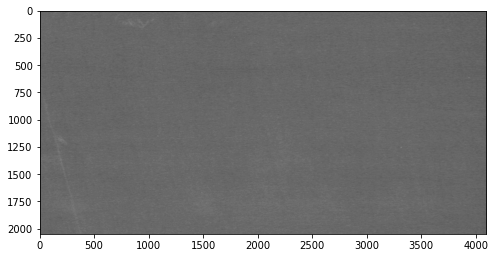

Combined Thresh


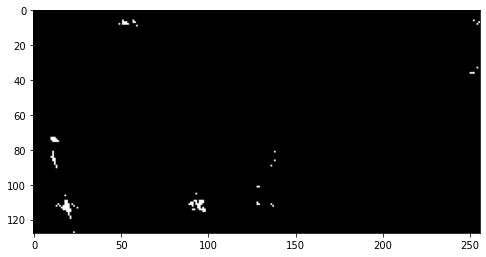

Thresh Global


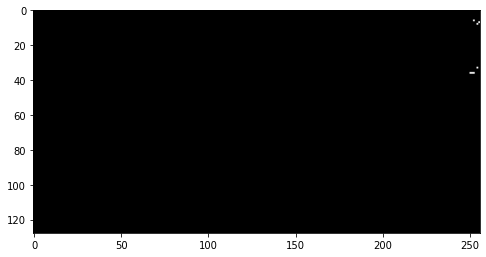

Wavelet Horizontal


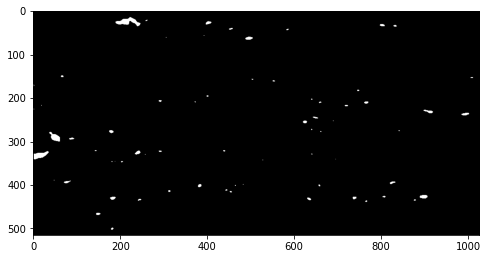

Wavelet Vertical


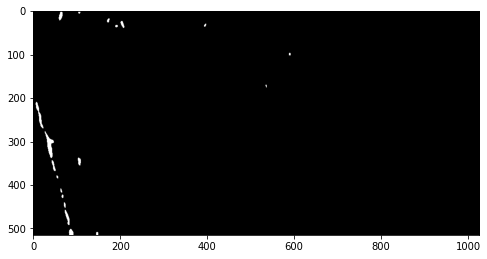

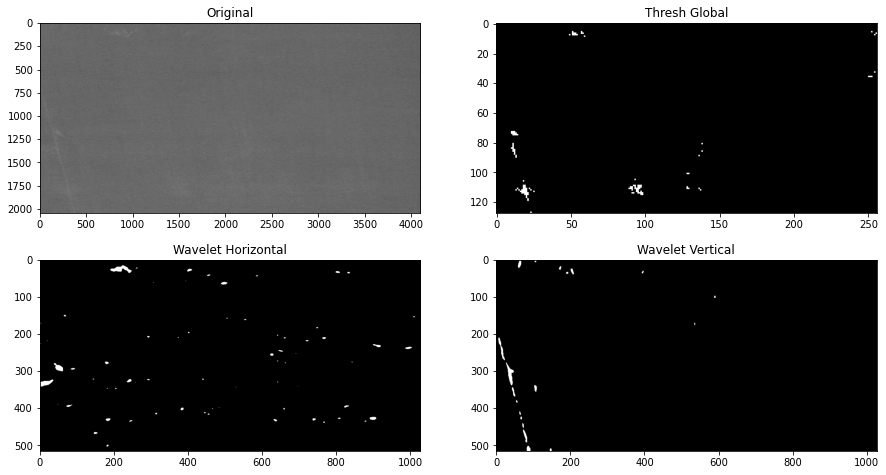

Imagem Numero 1
Media imagem pequena: 99.82025146484375 Variancia: 14.533303257077932
---Threshold time is: 4.8160552978515625e-05 seconds ---
White pixels count: 664
Variancia Vertical: 621.836046504869
Variancia Horizontal: 1204.2427977604189
---Wavelet time is: 0.43578100204467773 seconds ---
Original


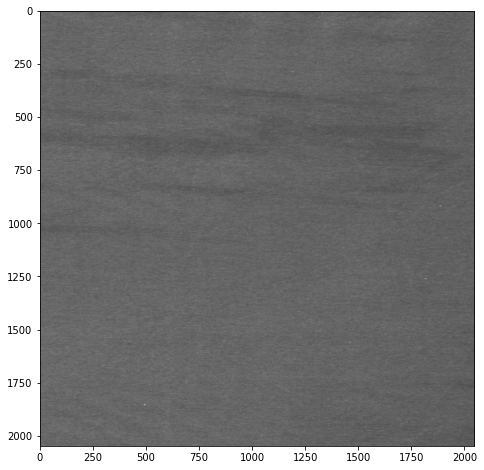

Combined Thresh


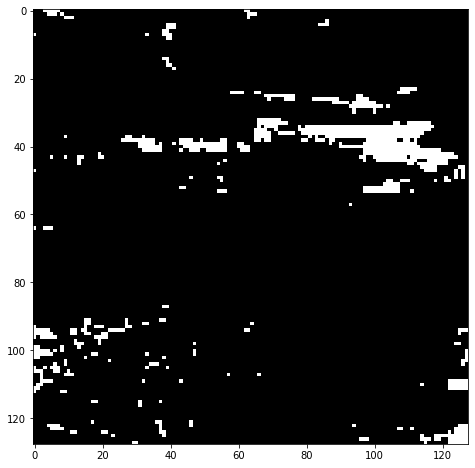

Thresh Global


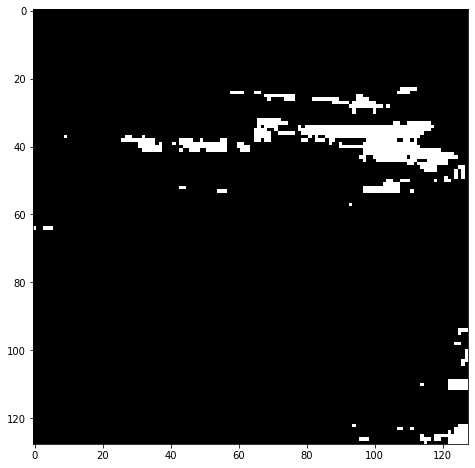

Wavelet Horizontal


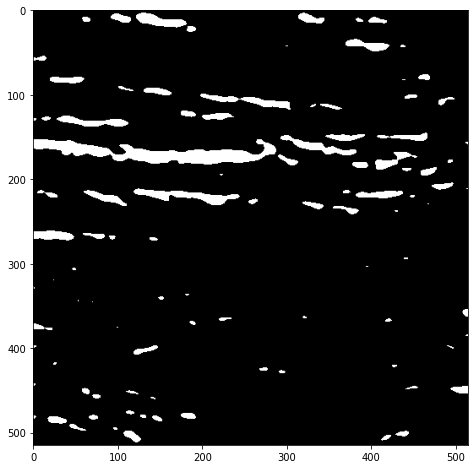

Wavelet Vertical


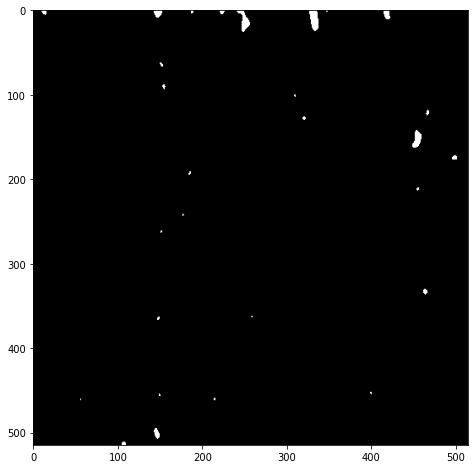

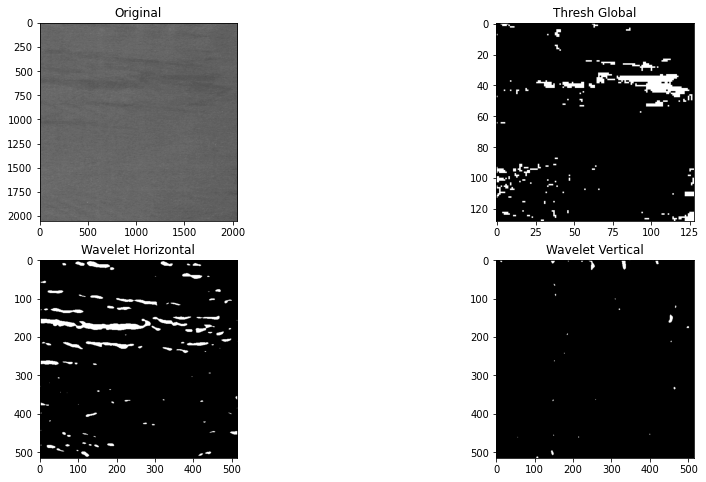

Imagem Numero 2
Media imagem pequena: 95.10498046875 Variancia: 5.85842490196228
---Threshold time is: 3.743171691894531e-05 seconds ---
White pixels count: 23
Variancia Vertical: 737.1349176704144
Variancia Horizontal: 1122.804836542577
---Wavelet time is: 2.3302786350250244 seconds ---
Original


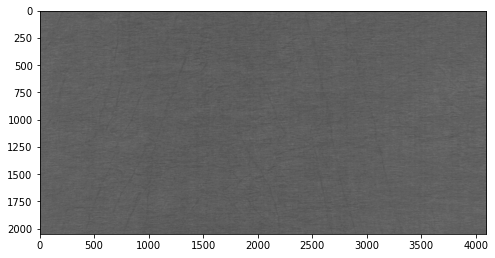

Combined Thresh


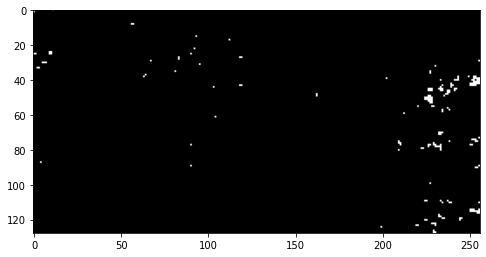

Thresh Global


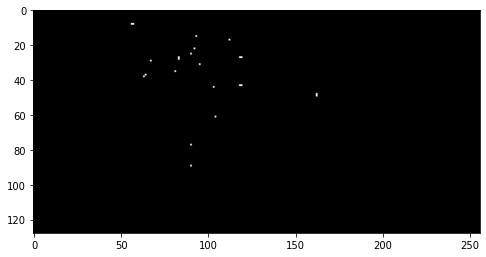

Wavelet Horizontal


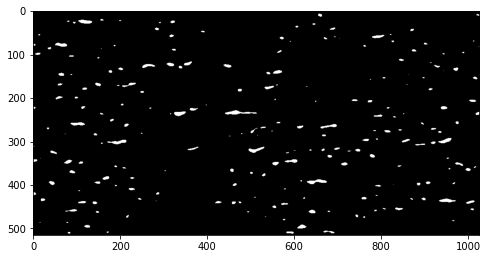

Wavelet Vertical


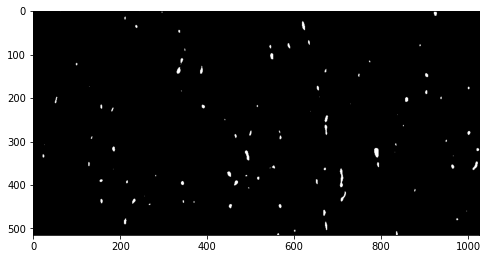

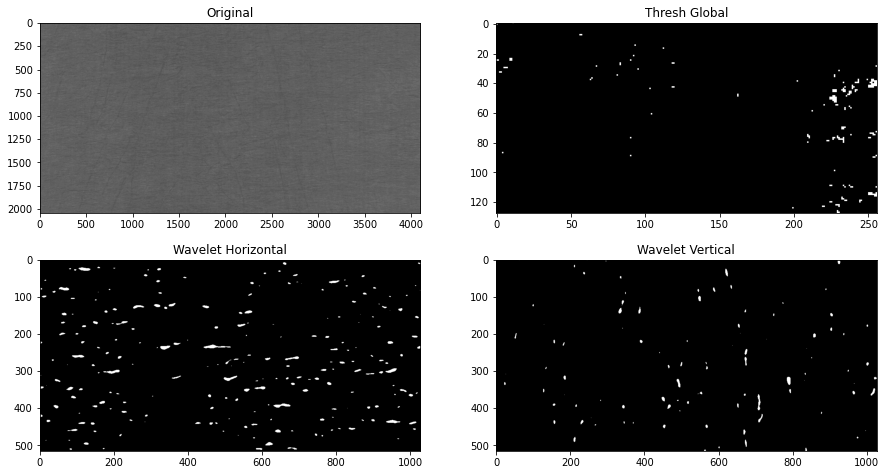

Imagem Numero 3
Media imagem pequena: 112.72418212890625 Variancia: 2.3253527246415615
---Threshold time is: 3.2901763916015625e-05 seconds ---
White pixels count: 0
Variancia Vertical: 356.39786707135244
Variancia Horizontal: 765.1084619892047
---Wavelet time is: 0.4326903820037842 seconds ---
Original


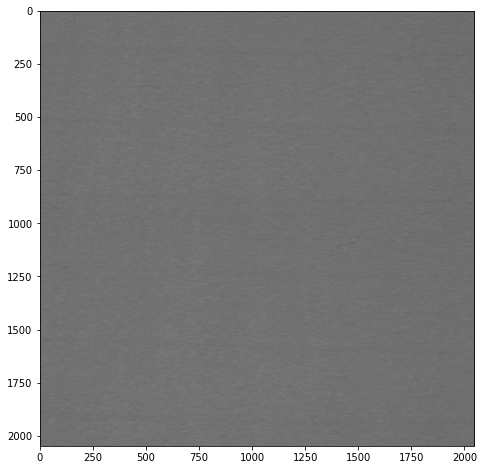

Combined Thresh


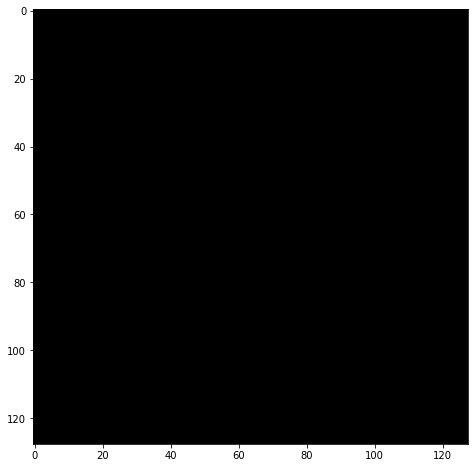

Thresh Global


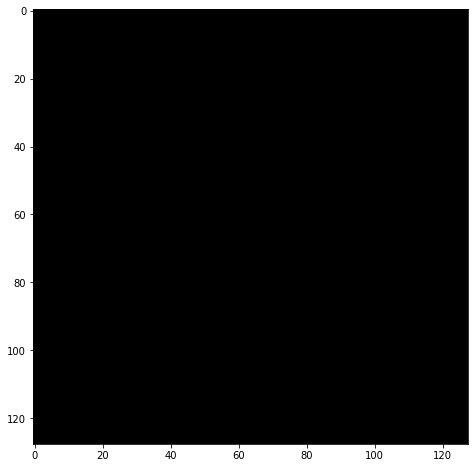

Wavelet Horizontal


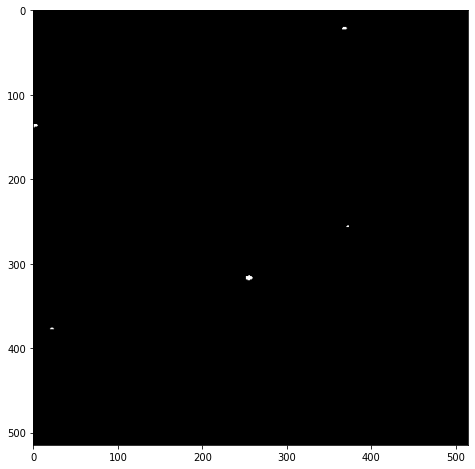

Wavelet Vertical


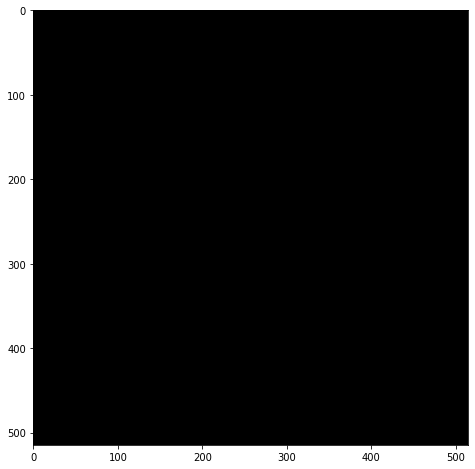

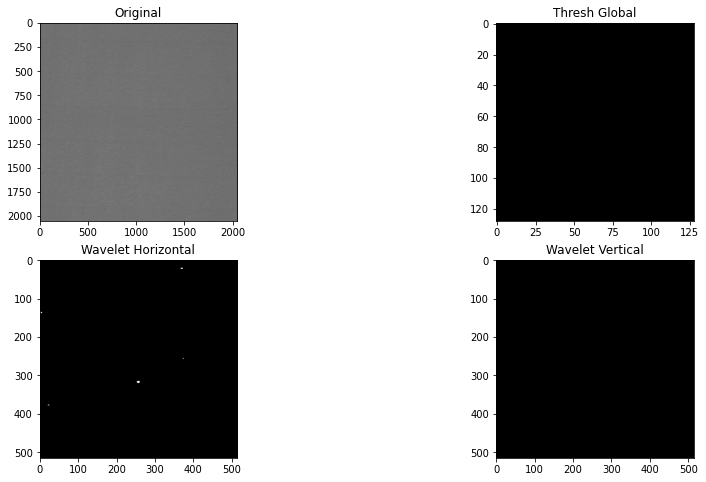

Imagem Numero 4
Media imagem pequena: 94.429443359375 Variancia: 5.165920197963715
---Threshold time is: 3.409385681152344e-05 seconds ---
White pixels count: 11
Variancia Vertical: 732.5285685646567
Variancia Horizontal: 1091.695105852398
---Wavelet time is: 2.3233065605163574 seconds ---
Original


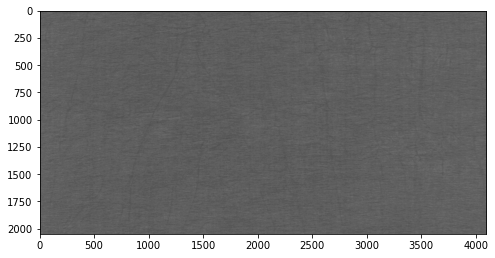

Combined Thresh


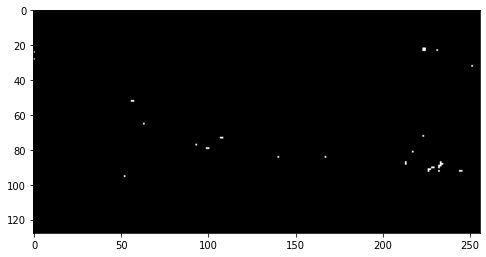

Thresh Global


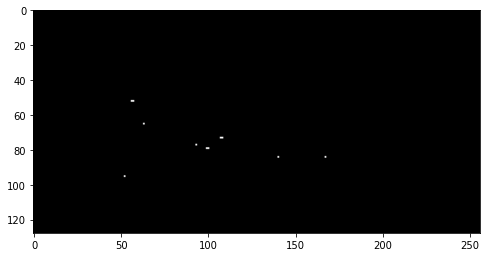

Wavelet Horizontal


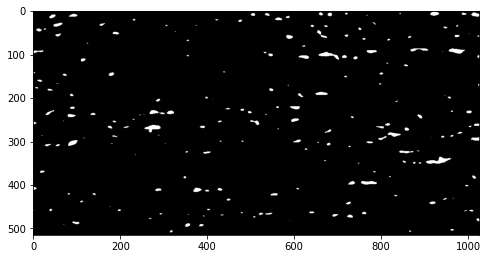

Wavelet Vertical


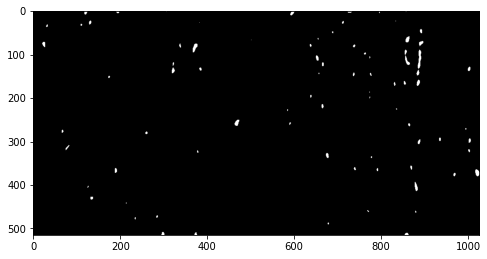

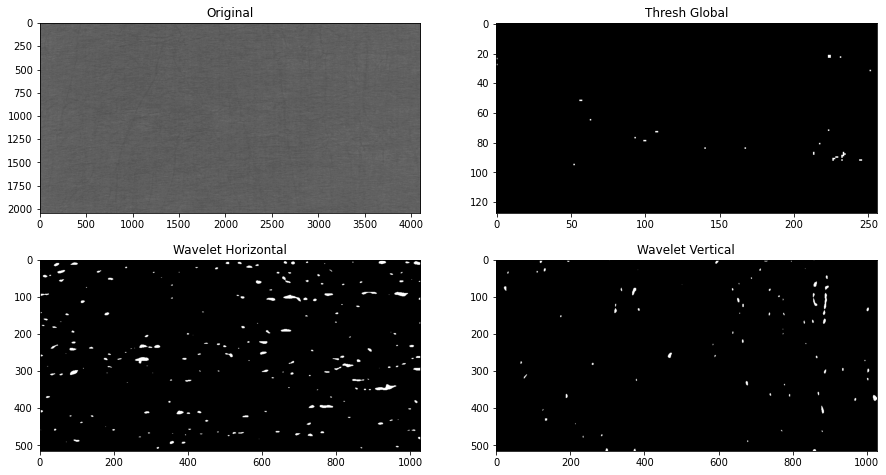

Imagem Numero 5
Media imagem pequena: 103.86395263671875 Variancia: 6.27854922041297
---Threshold time is: 6.341934204101562e-05 seconds ---
White pixels count: 6
Variancia Vertical: 561.4604977263856
Variancia Horizontal: 708.3465396113678
---Wavelet time is: 2.2401487827301025 seconds ---
Original


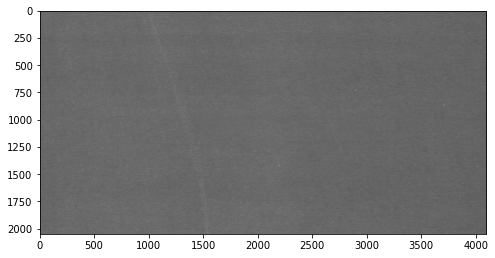

Combined Thresh


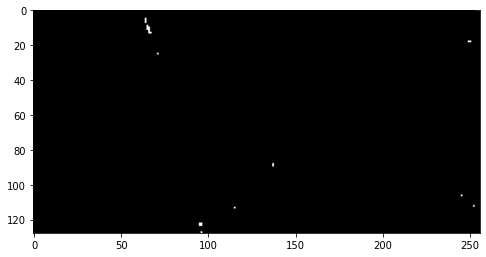

Thresh Global


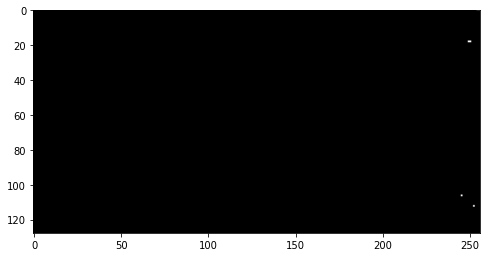

Wavelet Horizontal


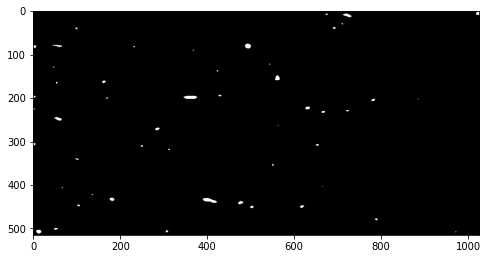

Wavelet Vertical


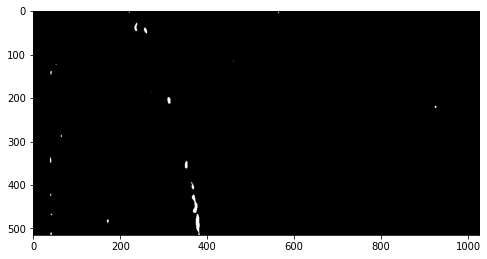

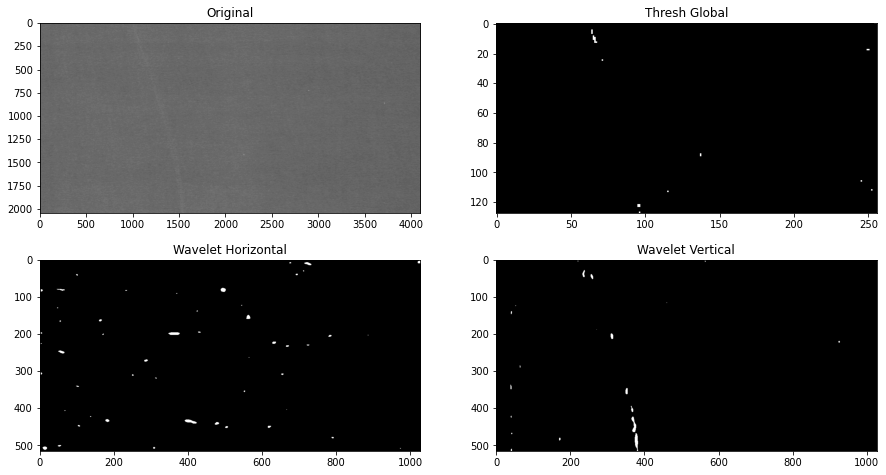

Imagem Numero 6
Media imagem pequena: 99.12078857421875 Variancia: 28.78417721018195
---Threshold time is: 3.170967102050781e-05 seconds ---
White pixels count: 311
Variancia Vertical: 305.9127596443568
Variancia Horizontal: 609.1395206246107
---Wavelet time is: 0.4219214916229248 seconds ---
Original


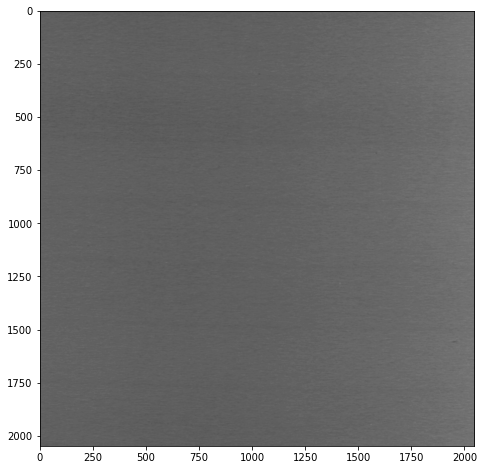

Combined Thresh


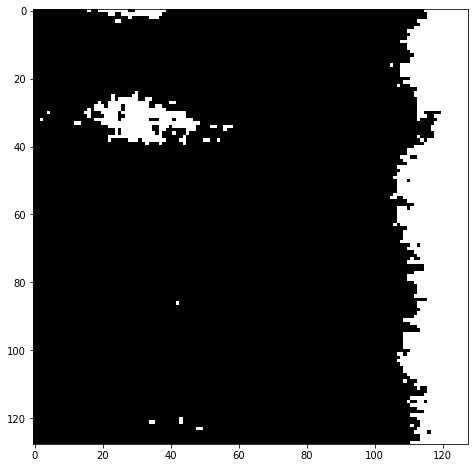

Thresh Global


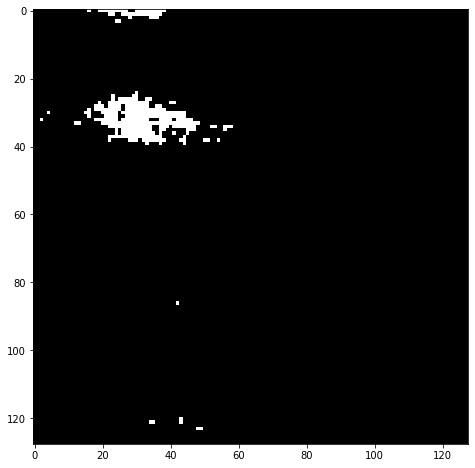

Wavelet Horizontal


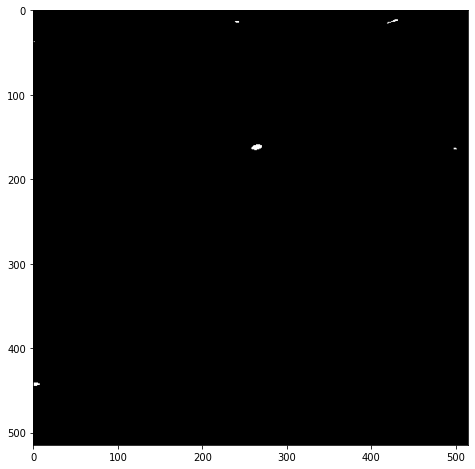

Wavelet Vertical


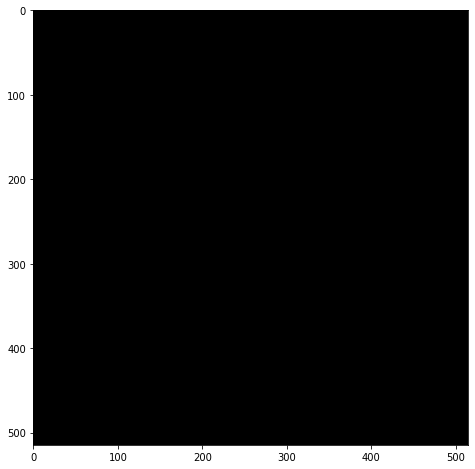

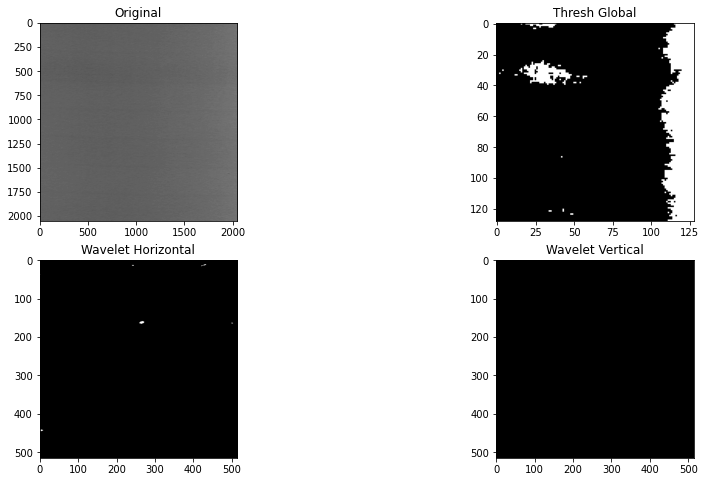

Imagem Numero 7
Media imagem pequena: 98.9404296875 Variancia: 30.846671104431152
---Threshold time is: 3.528594970703125e-05 seconds ---
White pixels count: 126
Variancia Vertical: 317.8360340516072
Variancia Horizontal: 571.1187690580582
---Wavelet time is: 0.45070958137512207 seconds ---
Original


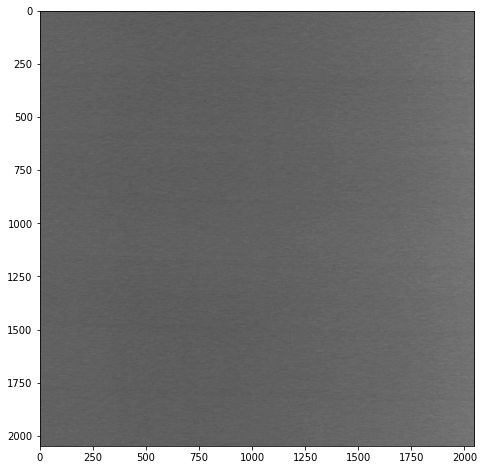

Combined Thresh


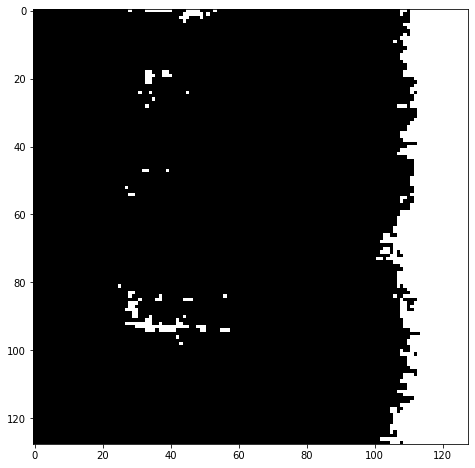

Thresh Global


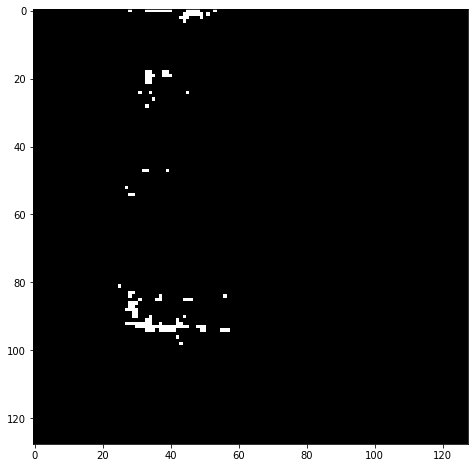

Wavelet Horizontal


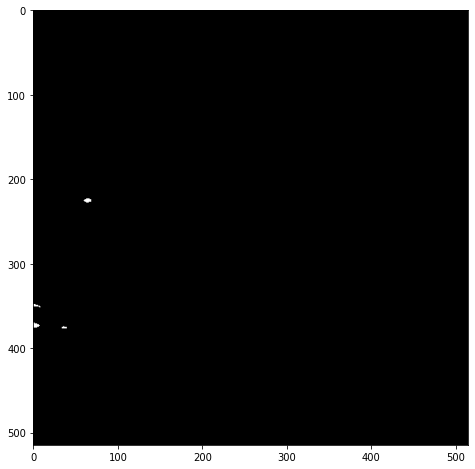

Wavelet Vertical


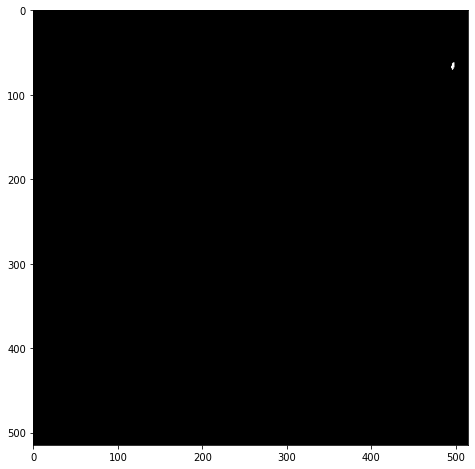

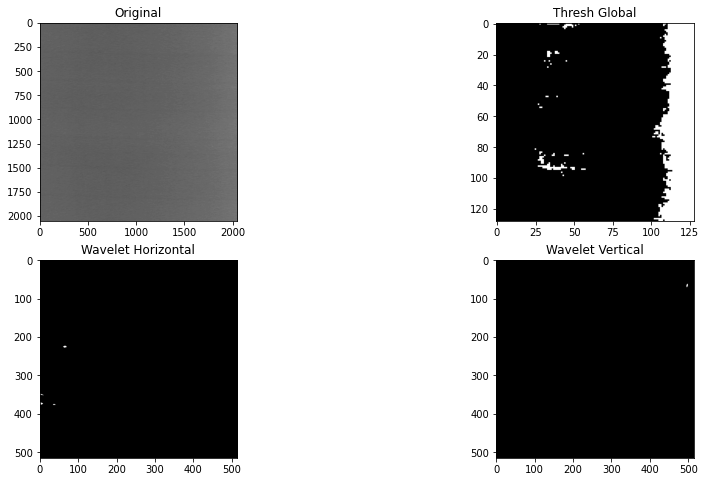

Imagem Numero 8
Media imagem pequena: 98.69921875 Variancia: 28.251327514648438
---Threshold time is: 3.218650817871094e-05 seconds ---
White pixels count: 0
Variancia Vertical: 303.89541915409444
Variancia Horizontal: 564.936072145134
---Wavelet time is: 0.43464040756225586 seconds ---
Original


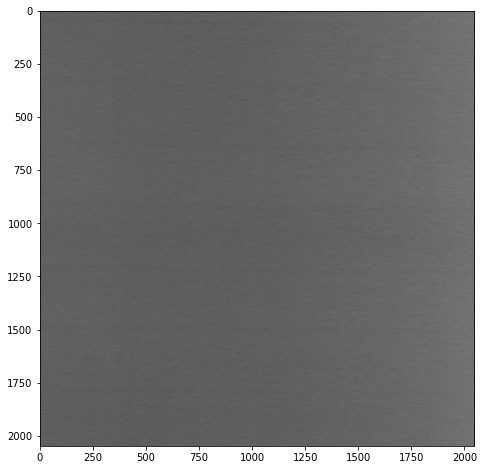

Combined Thresh


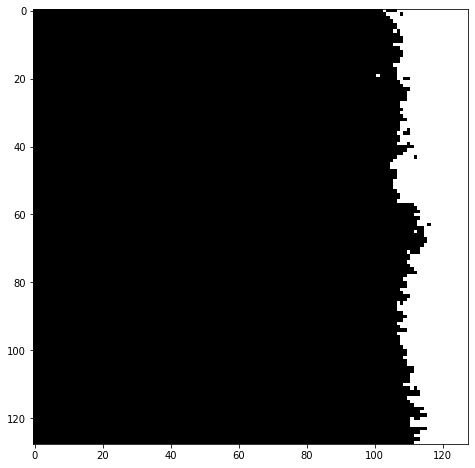

Thresh Global


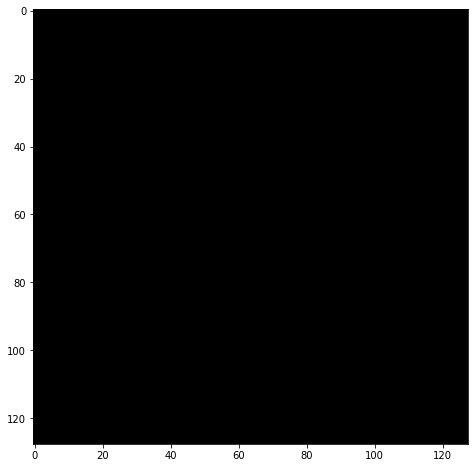

Wavelet Horizontal


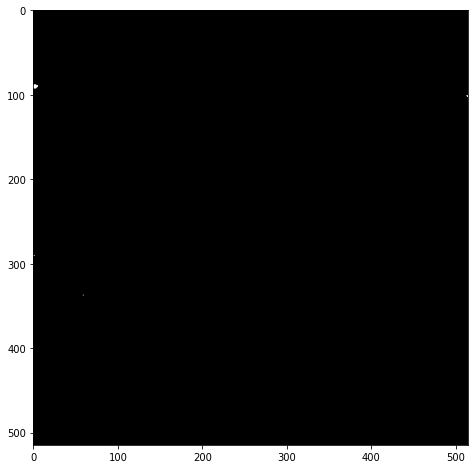

Wavelet Vertical


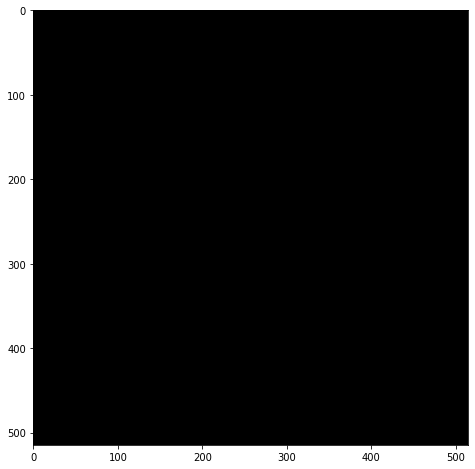

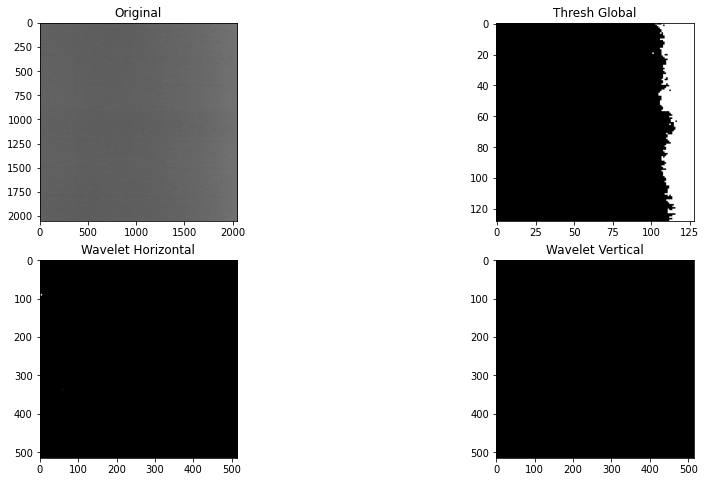

Imagem Numero 9
Media imagem pequena: 103.76510620117188 Variancia: 5.313019483350217
---Threshold time is: 3.5762786865234375e-05 seconds ---
White pixels count: 7
Variancia Vertical: 582.554943777555
Variancia Horizontal: 883.0811164970326
---Wavelet time is: 2.314746379852295 seconds ---
Original


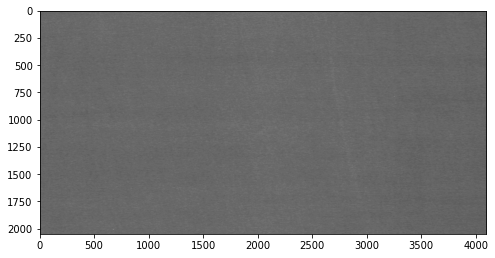

Combined Thresh


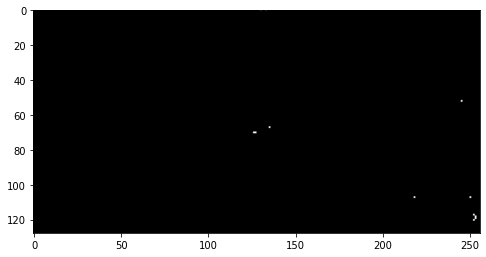

Thresh Global


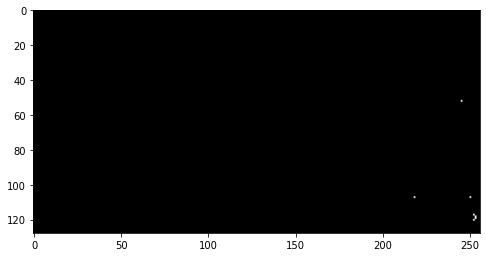

Wavelet Horizontal


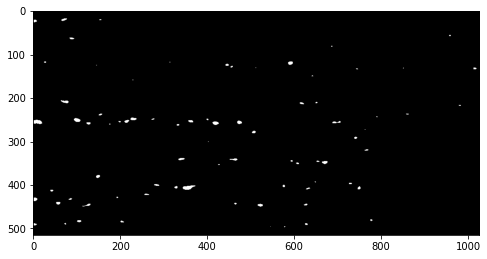

Wavelet Vertical


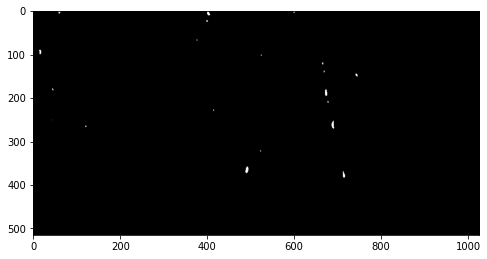

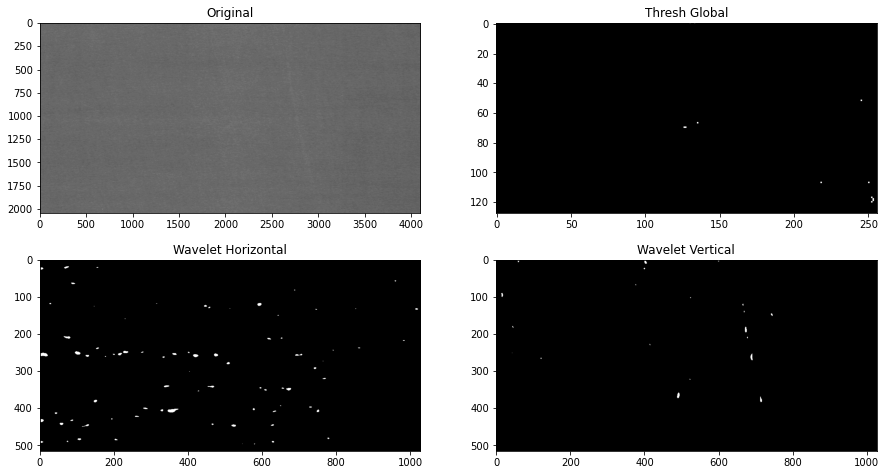

Imagem Numero 10
Media imagem pequena: 113.06610107421875 Variancia: 2.7553352378308773
---Threshold time is: 4.172325134277344e-05 seconds ---
White pixels count: 0
Variancia Vertical: 349.52964876898295
Variancia Horizontal: 717.291884905338
---Wavelet time is: 0.3950622081756592 seconds ---
Original


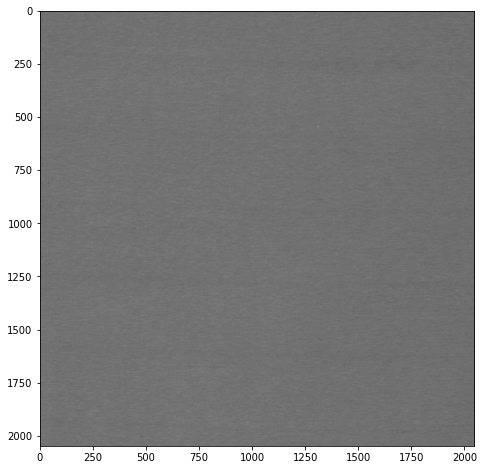

Combined Thresh


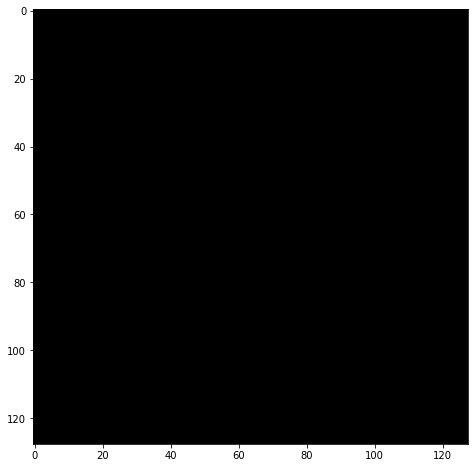

Thresh Global


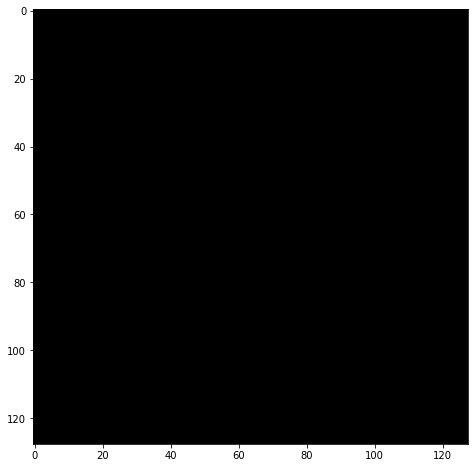

Wavelet Horizontal


Wavelet Vertical


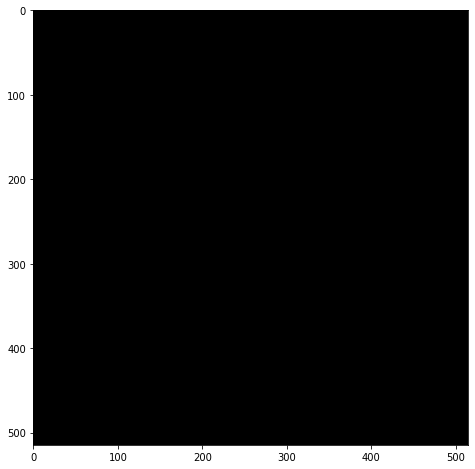

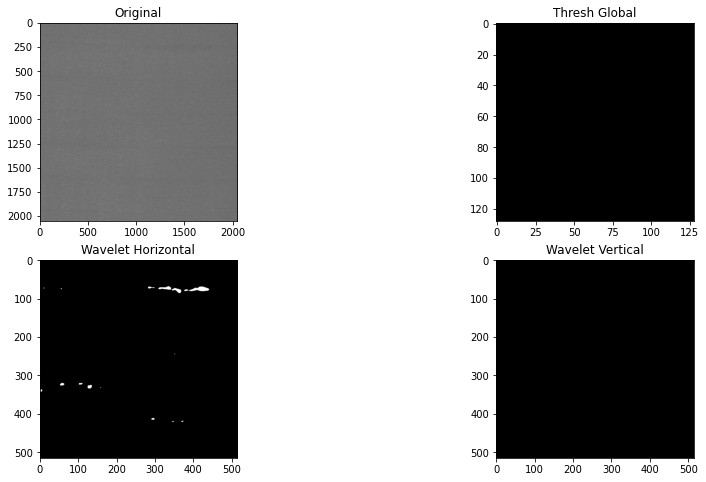

Imagem Numero 11
Media imagem pequena: 108.146484375 Variancia: 20.48696517944336
---Threshold time is: 6.413459777832031e-05 seconds ---
White pixels count: 61
Variancia Vertical: 443.2720171290494
Variancia Horizontal: 681.9702708352004
---Wavelet time is: 0.4277641773223877 seconds ---
Original


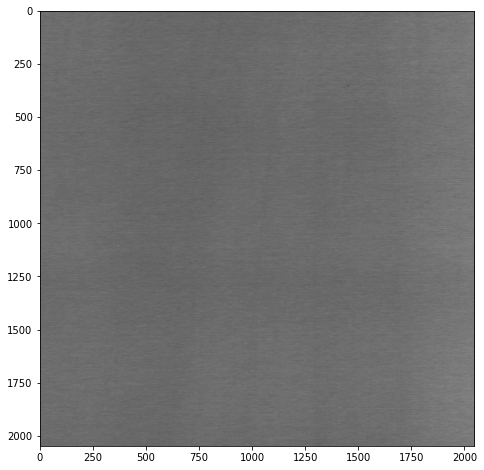

Combined Thresh


Thresh Global


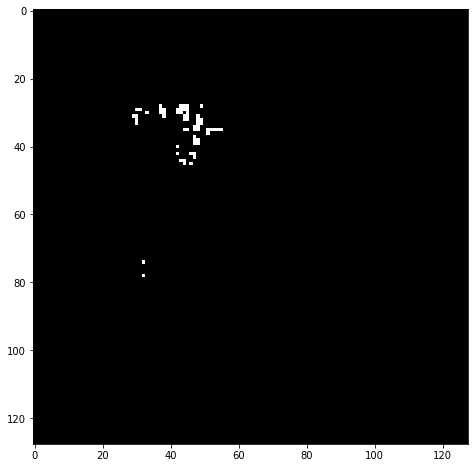

Wavelet Horizontal


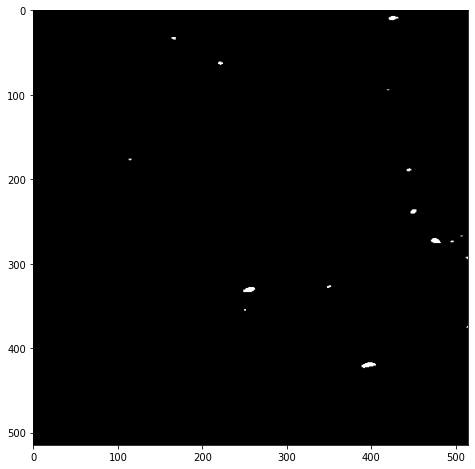

Wavelet Vertical


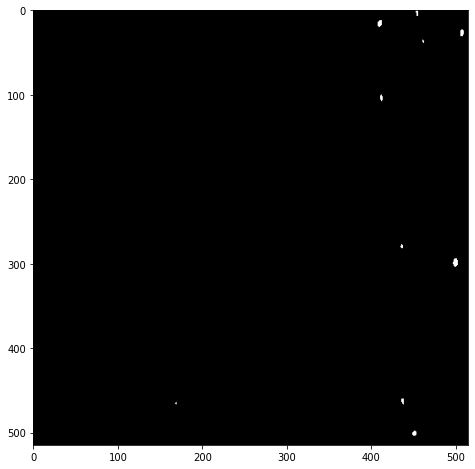

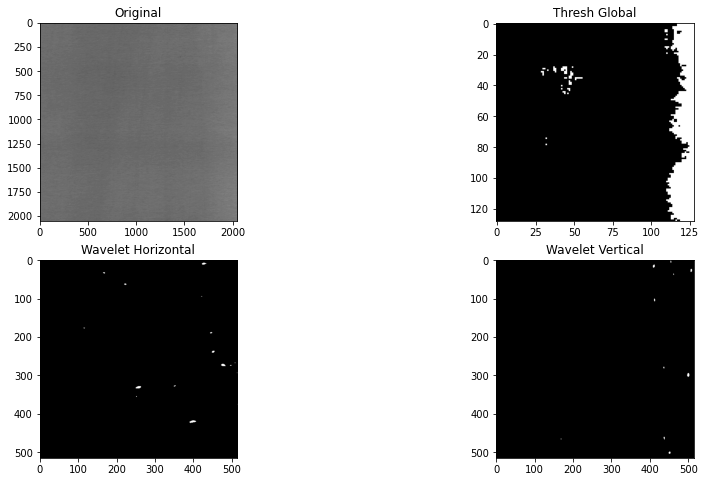

Imagem Numero 12
Media imagem pequena: 100.5711669921875 Variancia: 13.466859087347984
---Threshold time is: 3.457069396972656e-05 seconds ---
White pixels count: 792
Variancia Vertical: 624.1640540614303
Variancia Horizontal: 1211.662710071247
---Wavelet time is: 0.44717907905578613 seconds ---
Original


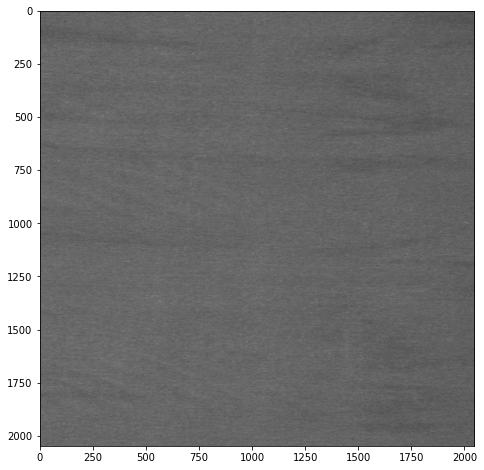

Combined Thresh


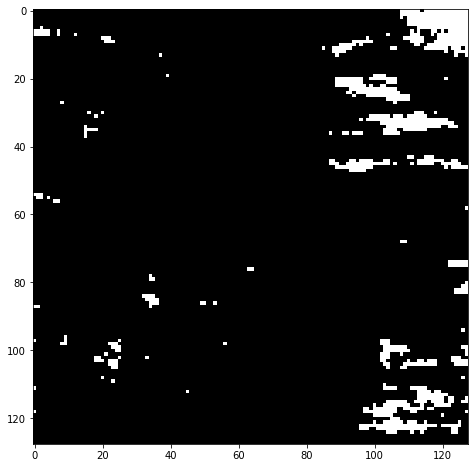

Thresh Global


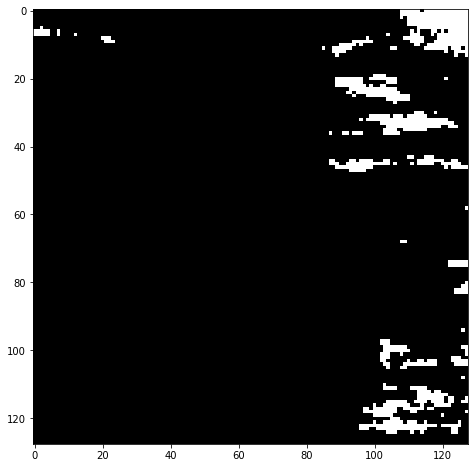

Wavelet Horizontal


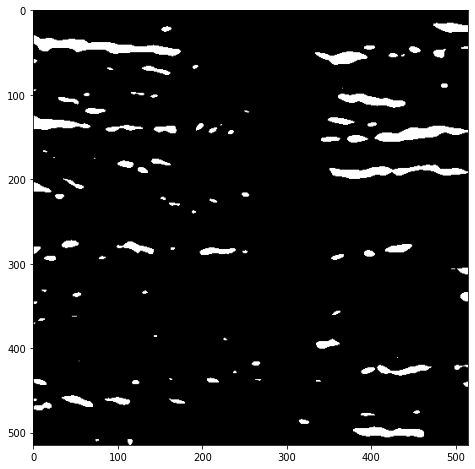

Wavelet Vertical


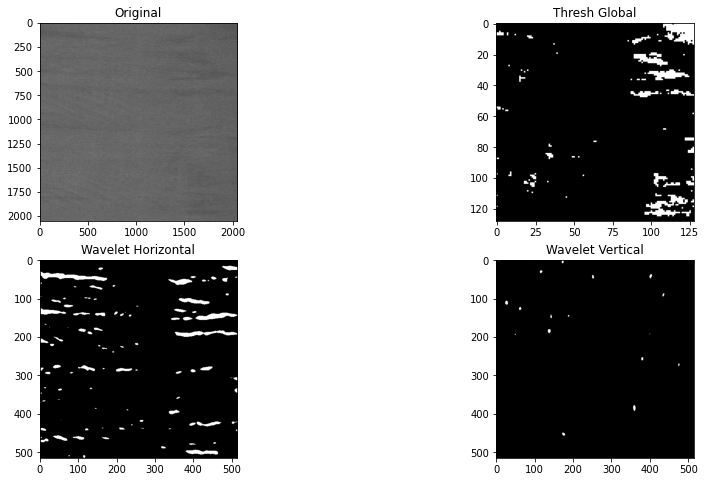

Imagem Numero 13
Media imagem pequena: 104.33380126953125 Variancia: 5.669033255428076
---Threshold time is: 3.504753112792969e-05 seconds ---
White pixels count: 23
Variancia Vertical: 356.3496879733215
Variancia Horizontal: 746.0957731714694
---Wavelet time is: 2.1142940521240234 seconds ---
Original


Combined Thresh


Thresh Global


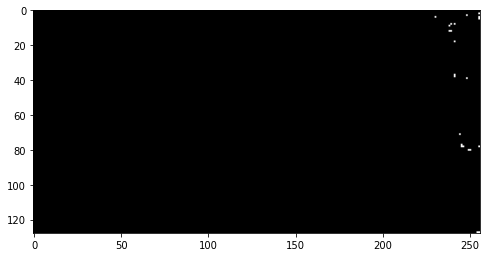

Wavelet Horizontal


Wavelet Vertical


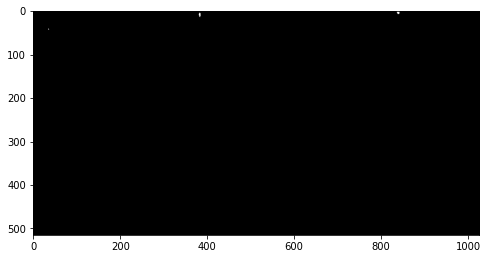

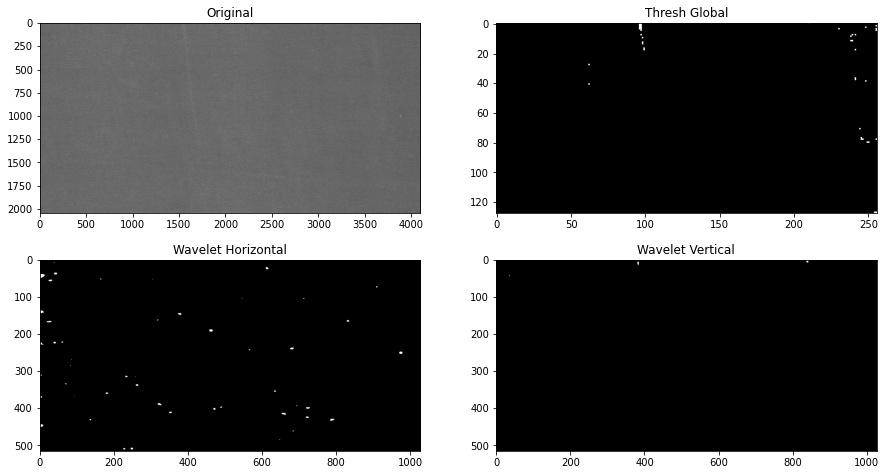

Imagem Numero 14
Media imagem pequena: 95.02108764648438 Variancia: 4.498120984993875
---Threshold time is: 3.504753112792969e-05 seconds ---
White pixels count: 11
Variancia Vertical: 694.4104840987782
Variancia Horizontal: 1129.4368940815039
---Wavelet time is: 2.2114367485046387 seconds ---
Original


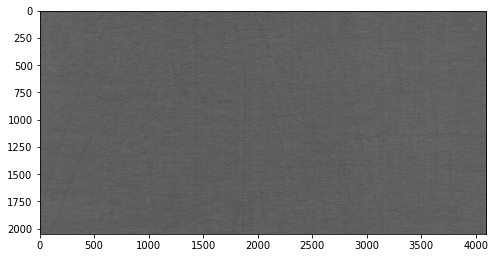

Combined Thresh


Thresh Global


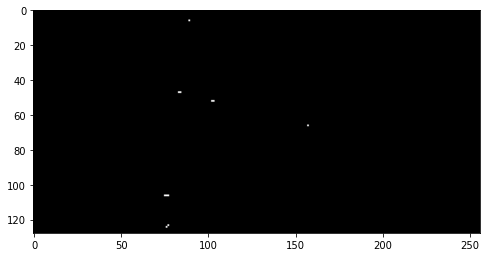

Wavelet Horizontal


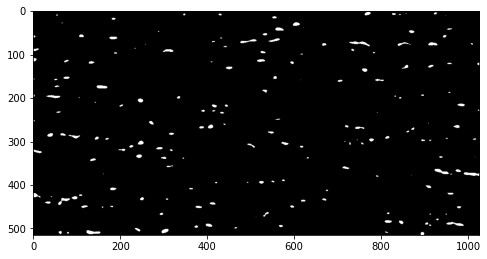

Wavelet Vertical


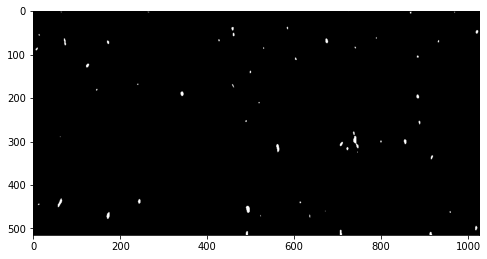

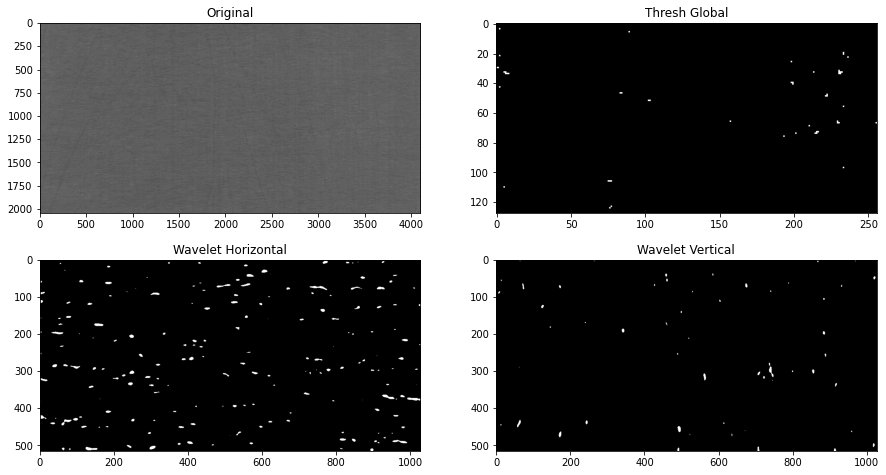

Imagem Numero 15
Media imagem pequena: 95.18356323242188 Variancia: 5.100734471343458
---Threshold time is: 3.409385681152344e-05 seconds ---
White pixels count: 11
Variancia Vertical: 663.5733971264227
Variancia Horizontal: 1117.5202020385757
---Wavelet time is: 2.168504476547241 seconds ---
Original


Combined Thresh


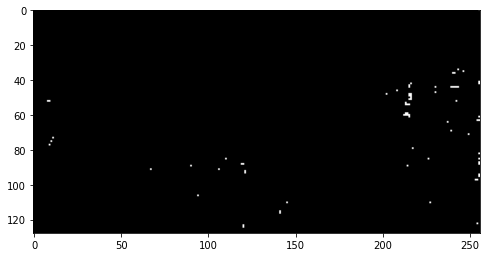

Thresh Global


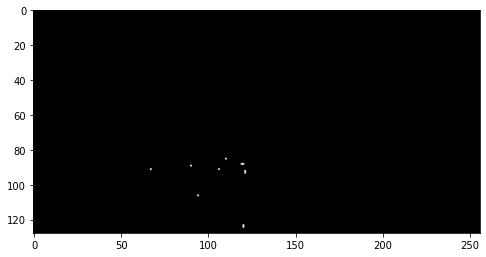

Wavelet Horizontal


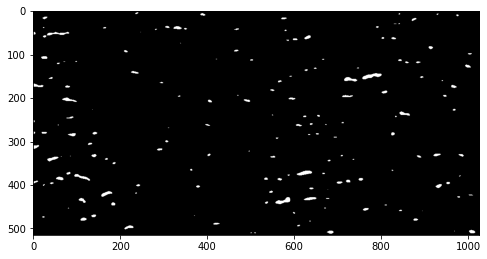

Wavelet Vertical


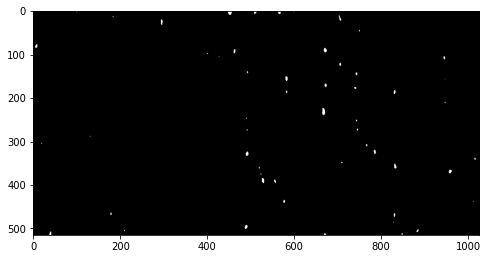

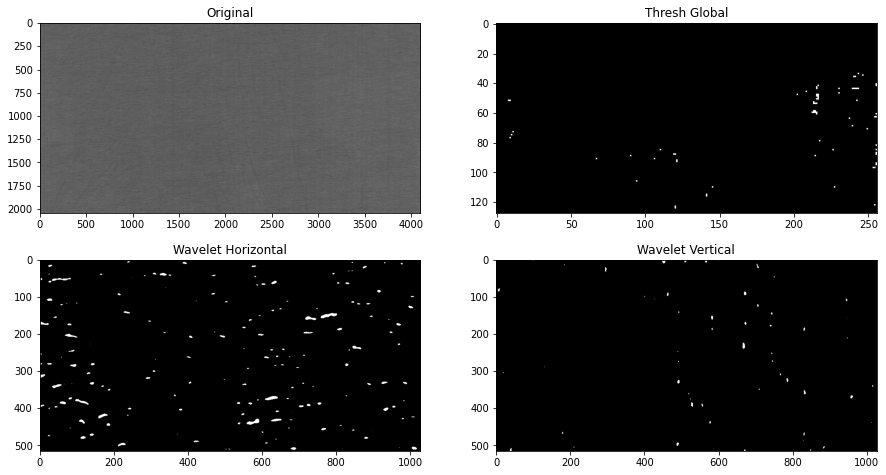

Imagem Numero 16
Media imagem pequena: 109.2833251953125 Variancia: 20.260791286826134
---Threshold time is: 3.218650817871094e-05 seconds ---
White pixels count: 111
Variancia Vertical: 448.04029643375253
Variancia Horizontal: 676.7266167272383
---Wavelet time is: 0.4211575984954834 seconds ---
Original


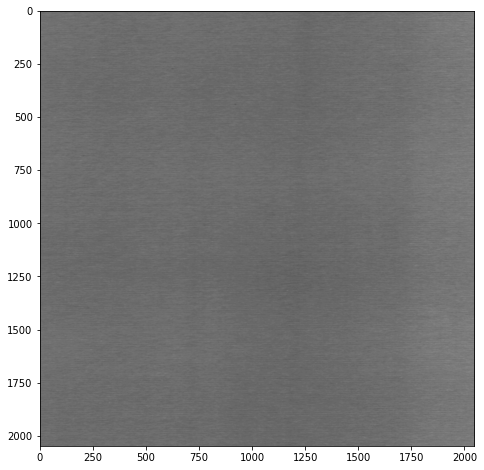

Combined Thresh


Thresh Global


Wavelet Horizontal


Wavelet Vertical


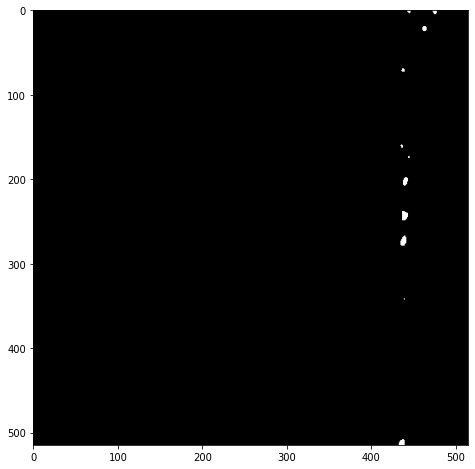

Imagem Numero 17
Media imagem pequena: 109.08197021484375 Variancia: 18.41631555184722
---Threshold time is: 2.9802322387695312e-05 seconds ---
White pixels count: 61
Variancia Vertical: 441.51700852259347
Variancia Horizontal: 640.3921594216575
---Wavelet time is: 0.4374396800994873 seconds ---
Original


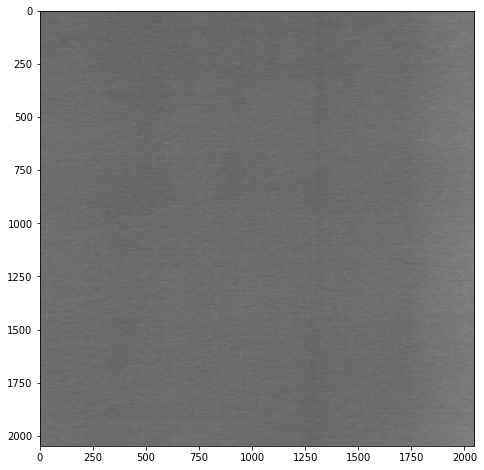

Combined Thresh


Thresh Global


Wavelet Horizontal


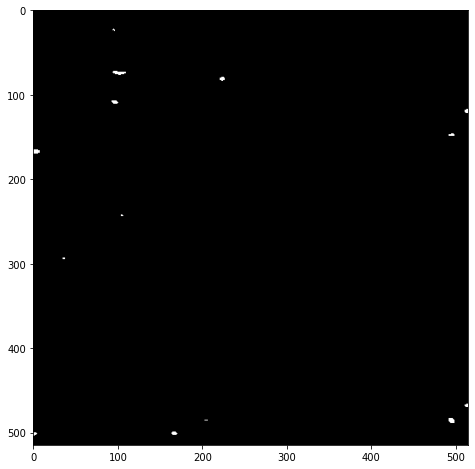

Wavelet Vertical


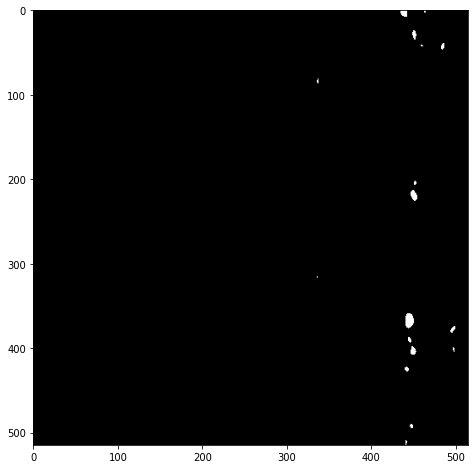

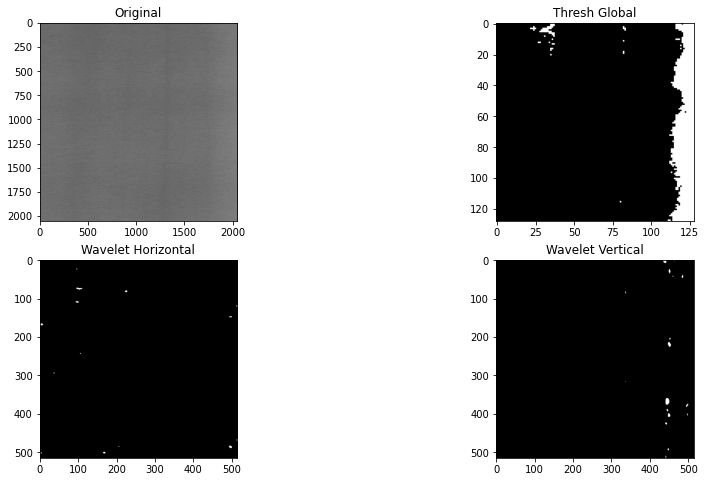

Imagem Numero 18
Media imagem pequena: 104.14651489257812 Variancia: 5.8119989624246955
---Threshold time is: 3.62396240234375e-05 seconds ---
White pixels count: 0
Variancia Vertical: 584.0921265366645
Variancia Horizontal: 858.2592482082747
---Wavelet time is: 2.1195361614227295 seconds ---
Original


Combined Thresh


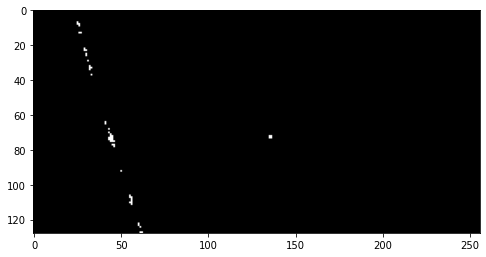

Thresh Global


Wavelet Horizontal


Wavelet Vertical


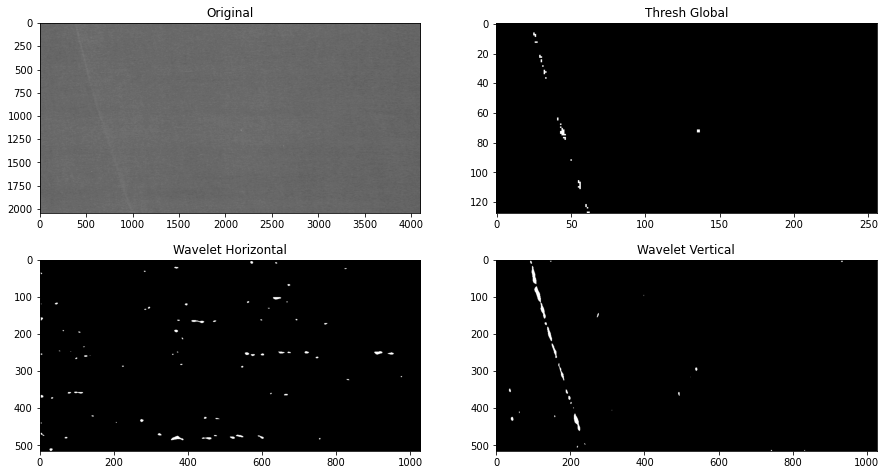

Imagem Numero 19
Media imagem pequena: 100.8472900390625 Variancia: 11.722407206892967
---Threshold time is: 3.218650817871094e-05 seconds ---
White pixels count: 542
Variancia Vertical: 607.9285937644504
Variancia Horizontal: 837.2031141885277
---Wavelet time is: 0.40508174896240234 seconds ---
Original


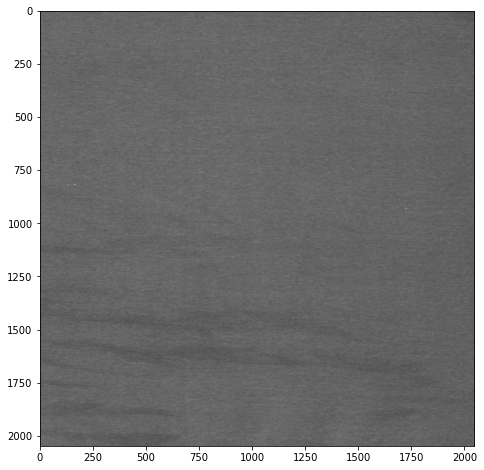

Combined Thresh


Thresh Global


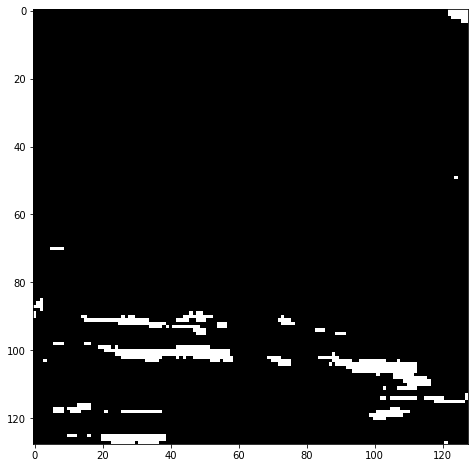

Wavelet Horizontal


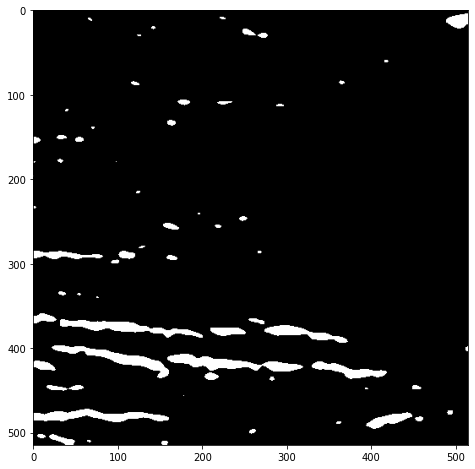

Wavelet Vertical


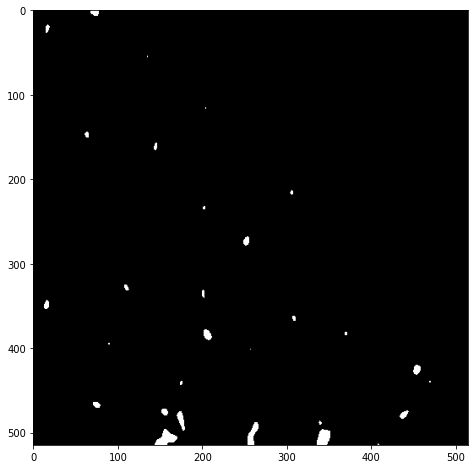

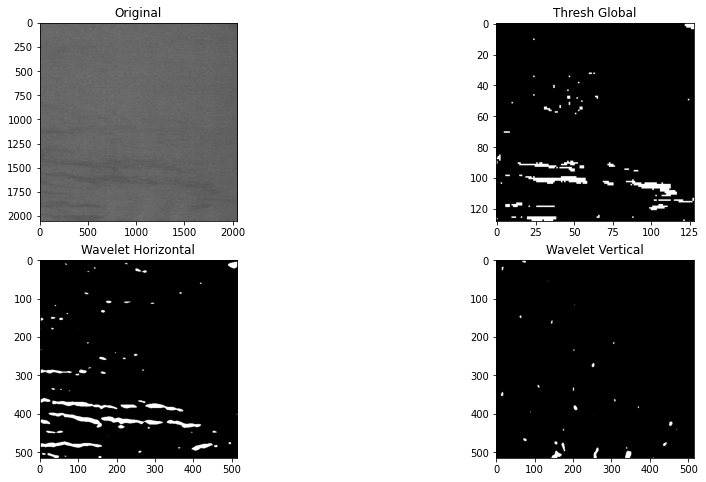

Imagem Numero 20
Media imagem pequena: 100.11053466796875 Variancia: 13.695484723895788
---Threshold time is: 6.079673767089844e-05 seconds ---
White pixels count: 1096
Variancia Vertical: 396.5584239782183
Variancia Horizontal: 347.2923389257167
---Wavelet time is: 0.43193721771240234 seconds ---
Original


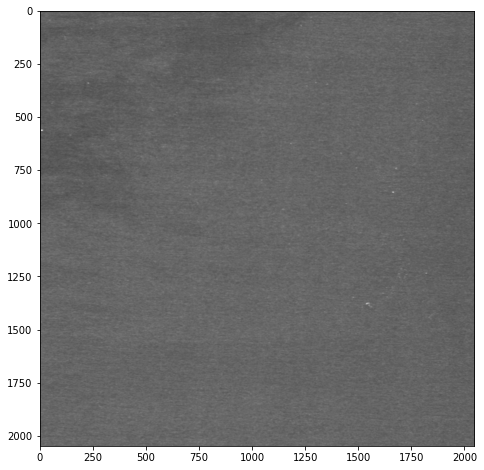

Combined Thresh


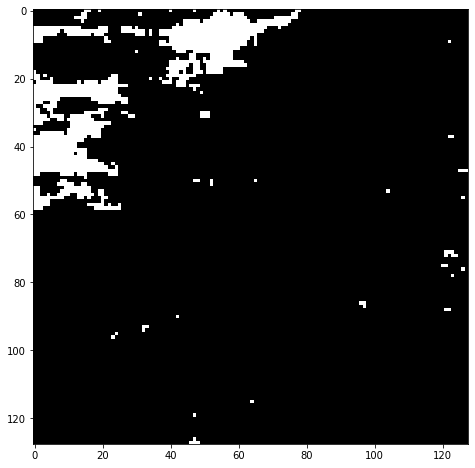

Thresh Global


Wavelet Horizontal


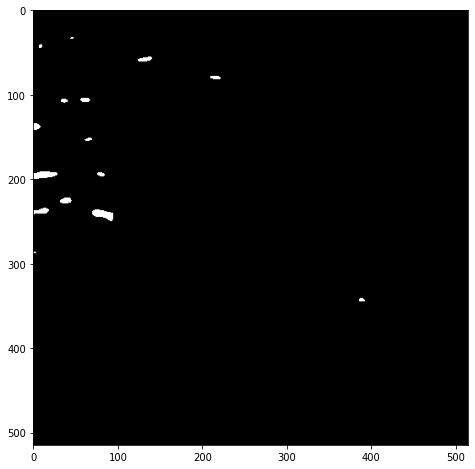

Wavelet Vertical


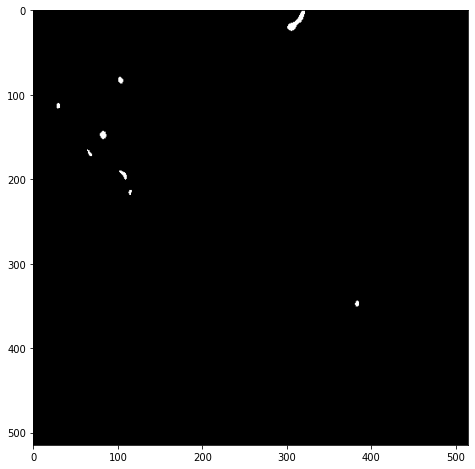

Imagem Numero 21
Media imagem pequena: 96.08929443359375 Variancia: 5.370078261941671
---Threshold time is: 3.600120544433594e-05 seconds ---
White pixels count: 62
Variancia Vertical: 737.5598396232034
Variancia Horizontal: 1261.618960063139
---Wavelet time is: 2.173461675643921 seconds ---
Original


Combined Thresh


Thresh Global


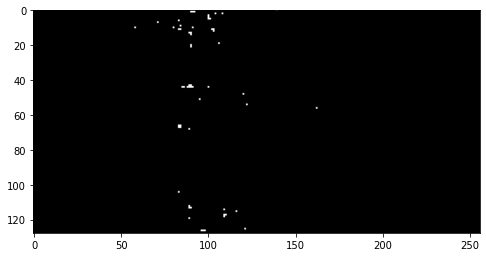

Wavelet Horizontal


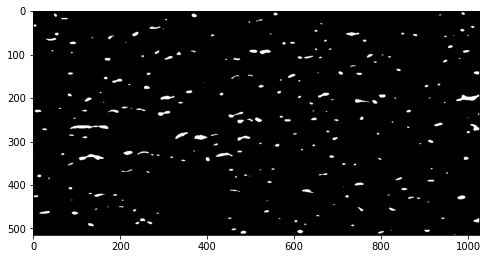

Wavelet Vertical


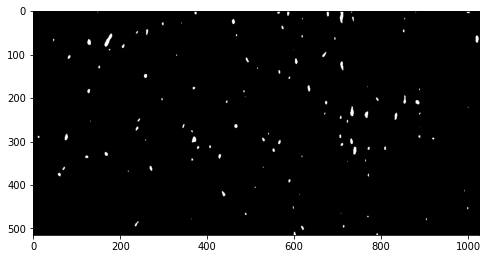

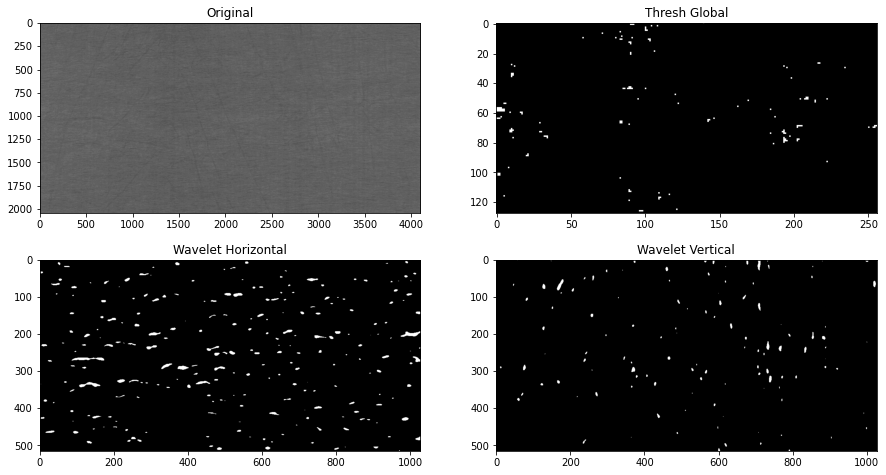

In [ ]:
#defeitos tingimento
idx = 0
for img in test_images:
  print("Imagem Numero",idx)
  idx += 1
  #processar com threshold simples
  #faz piramide da imagem para remover ruidos
  downArray = cv2.pyrDown(img)
  downArray = cv2.pyrDown(downArray)
  downArray = cv2.pyrDown(downArray)
  downArray = cv2.pyrDown(downArray)
  #downArray = cv2.GaussianBlur(downArray, (5, 5), 0)
  
  #downArray = cv2.GaussianBlur(img, (33, 33), 0)
  #downArray = cv2.GaussianBlur(downArray, (11, 11), 0)
  
  #obtem media da imagem
  avg = np.mean(downArray)
  var = np.var(downArray)
  print("Media imagem pequena:",avg,"Variancia:",var)
  start_time = time.time()
  ret,out = cv2.threshold(downArray,(avg*0.93),255,cv2.THRESH_BINARY_INV)
  ret,outBrightDefect = cv2.threshold(downArray,(avg*1.07),255,cv2.THRESH_BINARY)
  combinedThresh = cv2.bitwise_or(out,outBrightDefect)
  print("---Threshold time is: %s seconds ---" % (time.time() - start_time))
  
  #rescala a imagem para o tamanho original
  downArray = cv2.resize(downArray, None, fx = 16.0, fy = 16.0,)
  #faz o threshold da imagem baseados na media para obter os defeitos 
  nzCount = cv2.countNonZero(out);
  print("White pixels count:", nzCount)
  
  

  start_time = time.time()
  #processar com wavelet
  coeffs1 = pywt.dwt2(downArray, 'bior1.3',)
  LL, (LH, HL, HH) = coeffs1
  coeffs2 = pywt.dwt2(LL, 'bior1.3',)
  LL2, (LH2, HL2, HH2) = coeffs2
  #scale image to 0-255 pixel values
  LH2 = np.asmatrix(((LH2 - LH2.min()) * (1/(LH2.max() - LH2.min()) * 255)).astype('uint8'))
  HL2 = np.asmatrix(((HL2 - HL2.min()) * (1/(HL2.max() - HL2.min()) * 255)).astype('uint8'))
  HH2 = np.asmatrix(((HH2 - HH2.min()) * (1/(HH2.max() - HH2.min()) * 255)).astype('uint8'))
  
  print("Variancia Vertical:",np.var(HL2))
  #vertical
  HL2 = cv2.GaussianBlur(HL2, (5, 5), 0)
  HL2 = cv2.GaussianBlur(HL2, (21, 21), 0)
  ret,threshVertical = cv2.threshold(HL2,int(np.mean(HL2)*0.85),255,cv2.THRESH_BINARY_INV)
  #horizontal
  print("Variancia Horizontal:",np.var(LH2))
  LH2 = cv2.GaussianBlur(LH2, (5, 5), 0)
  LH2 = cv2.GaussianBlur(LH2, (21, 21), 0)
  ret,threshHorizontal = cv2.threshold(LH2,int(np.mean(LH2)*0.85),255,cv2.THRESH_BINARY_INV)
  print("---Wavelet time is: %s seconds ---" % (time.time() - start_time))
  
  # print("Original")
  # plt.figure(figsize=(8,8))
  # plt.imshow(img, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Combined Thresh")
  # plt.figure(figsize=(8,8))
  # plt.imshow(combinedThresh, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Thresh Global")
  # plt.figure(figsize=(8,8))
  # plt.imshow(out, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Wavelet Horizontal")
  # plt.figure(figsize=(8,8))
  # plt.imshow(threshHorizontal, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Wavelet Vertical")
  # plt.figure(figsize=(8,8))
  # plt.imshow(threshVertical, cmap='gray',vmin=0,vmax=255)
  # plt.show()


  fig, ax = plt.subplots(2,2,figsize=(15,8))
  ax[0,0].imshow(img,cmap='gray',vmin=0,vmax=255);
  ax[0,0].set_title('Original')
  ax[0,1].imshow(combinedThresh,cmap='gray',vmin=0,vmax=255);
  ax[0,1].set_title('Thresh Global')
  ax[1,0].imshow(threshHorizontal,cmap='gray',vmin=0,vmax=255);
  ax[1,0].set_title('Wavelet Horizontal')
  ax[1,1].imshow(threshVertical,cmap='gray',vmin=0,vmax=255);
  ax[1,1].set_title('Wavelet Vertical')
  # ax[2,0].imshow(otsu,cmap='gray',vmin=0,vmax=255);
  # ax[2,0].set_title('Otsu Thresh')

  plt.show()

## Processa Defeitos Físicos

Imagem Numero 0
Media imagem pequena: 130.19503784179688 Variancia: 2.779861851595342
---Threshold time is: 8.273124694824219e-05 seconds ---
White pixels count: 9
Variancia Vertical: 23.088234477292445
Variancia Horizontal: 27.58657407580564
---Wavelet time is: 2.1512057781219482 seconds ---
Original


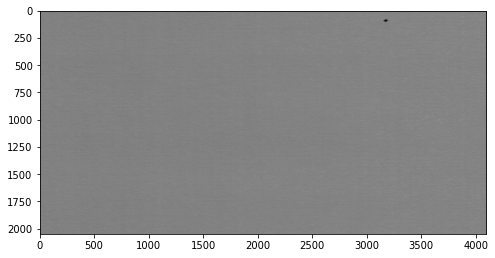

Combined Thresh


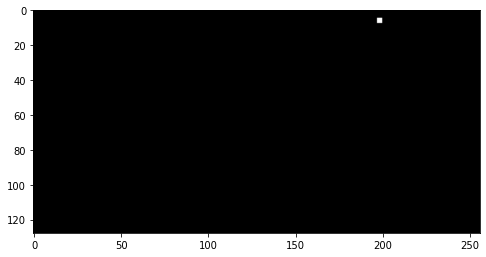

Thresh Global


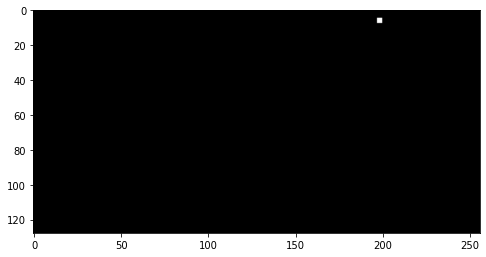

Wavelet Horizontal


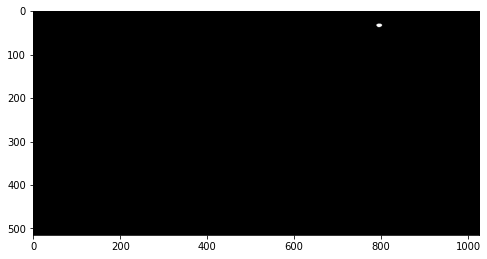

Wavelet Vertical


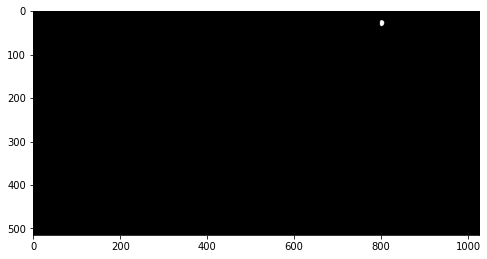

Imagem Numero 1
Media imagem pequena: 130.09295654296875 Variancia: 2.828517284244299
---Threshold time is: 0.000484466552734375 seconds ---
White pixels count: 6
Variancia Vertical: 19.674757234876207
Variancia Horizontal: 64.99300943477326
---Wavelet time is: 2.2656049728393555 seconds ---
Original


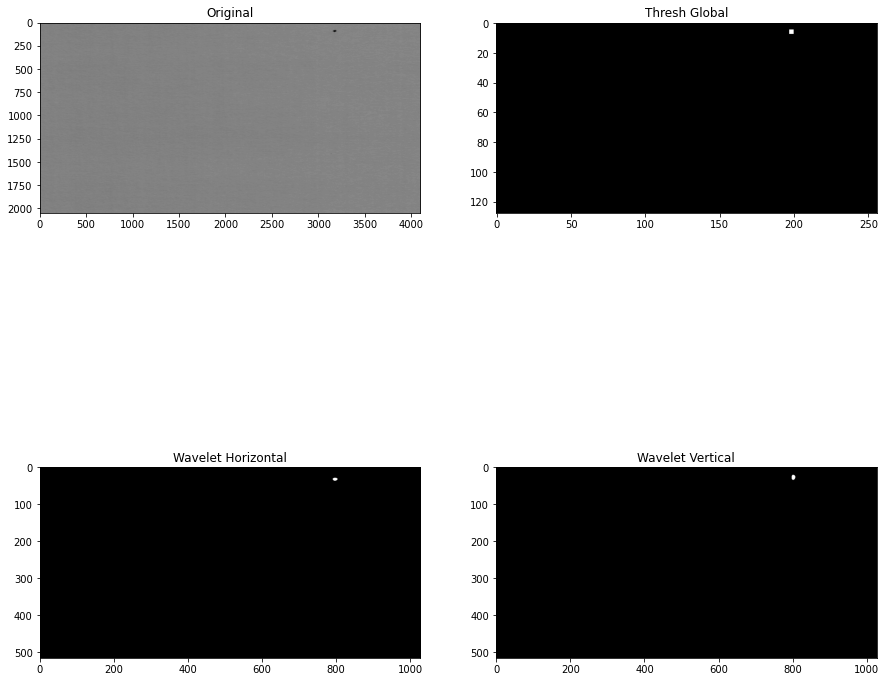

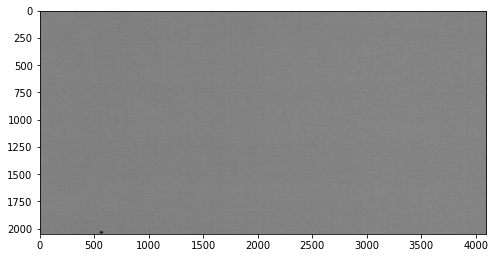

Combined Thresh


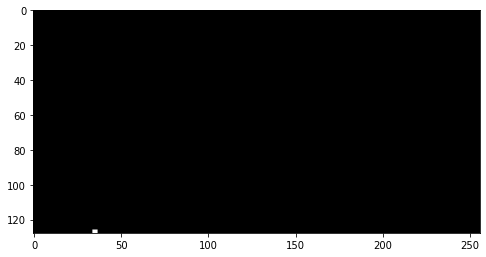

Thresh Global


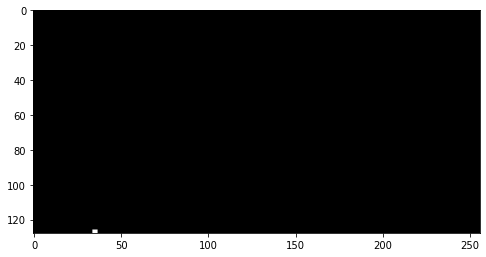

Wavelet Horizontal


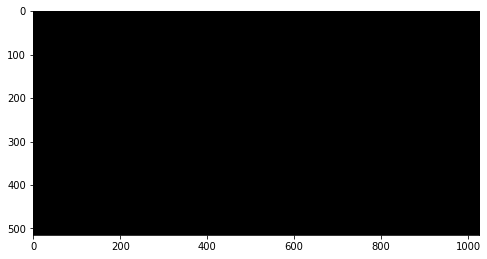

Wavelet Vertical


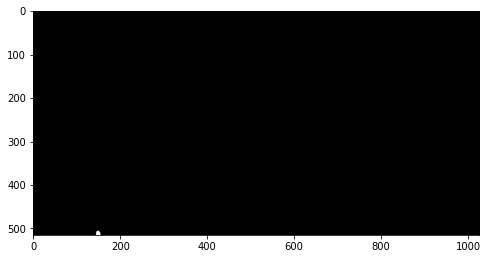

Imagem Numero 2
Media imagem pequena: 104.27569580078125 Variancia: 3.5937305949628353
---Threshold time is: 0.00016069412231445312 seconds ---
White pixels count: 0
Variancia Vertical: 429.0157295227213
Variancia Horizontal: 683.3690499392892
---Wavelet time is: 0.4670391082763672 seconds ---
Original


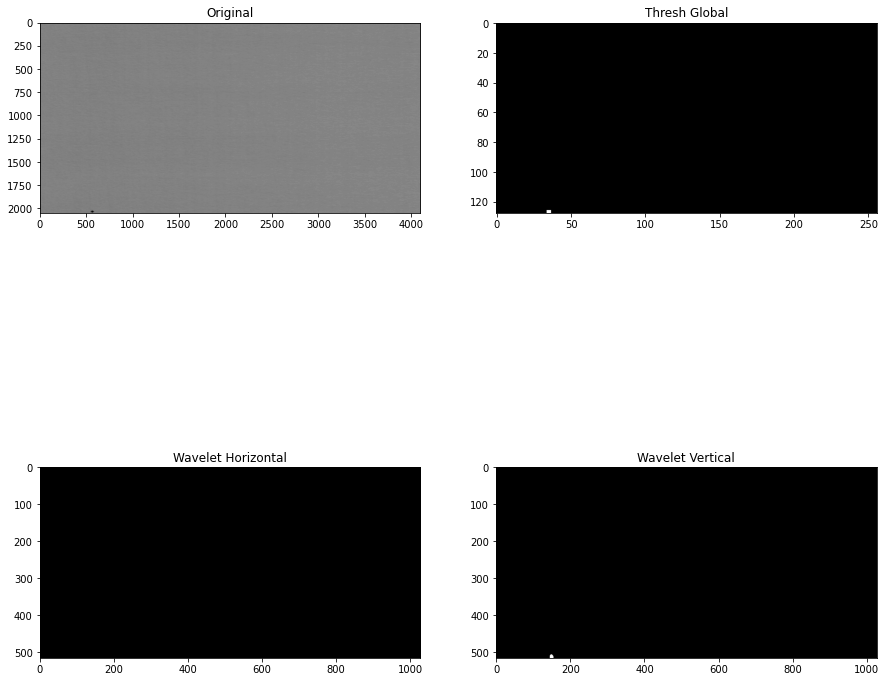

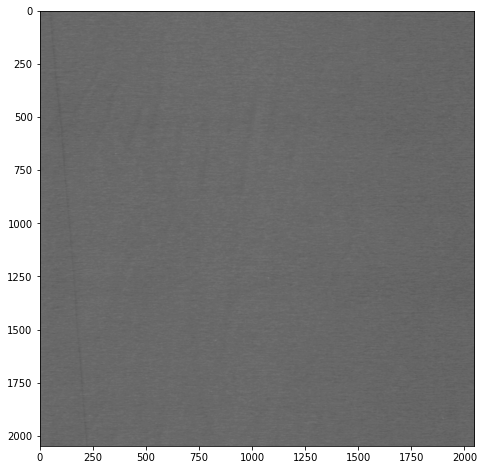

Combined Thresh


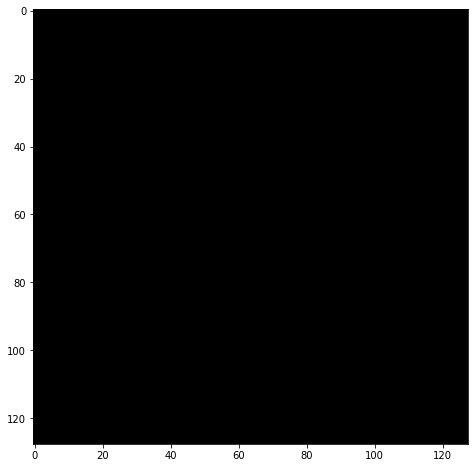

Thresh Global


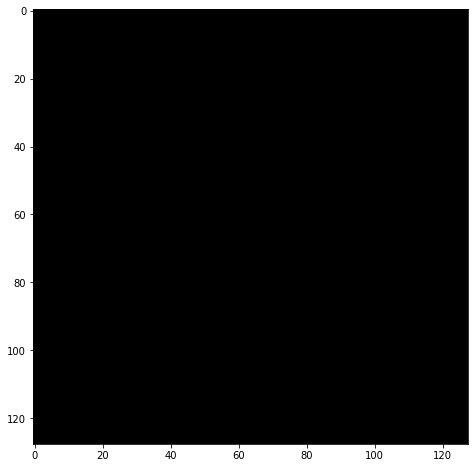

Wavelet Horizontal


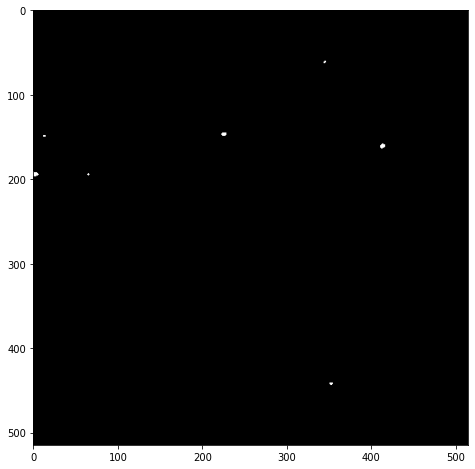

Wavelet Vertical


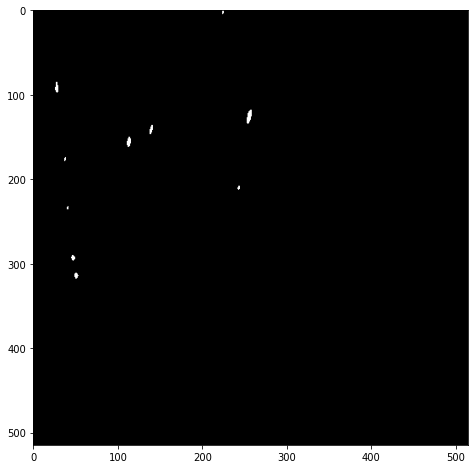

Imagem Numero 3
Media imagem pequena: 120.15908813476562 Variancia: 5.333058885298669
---Threshold time is: 0.0005662441253662109 seconds ---
White pixels count: 8
Variancia Vertical: 209.8198368218773
Variancia Horizontal: 167.59879173109658
---Wavelet time is: 2.2412643432617188 seconds ---
Original


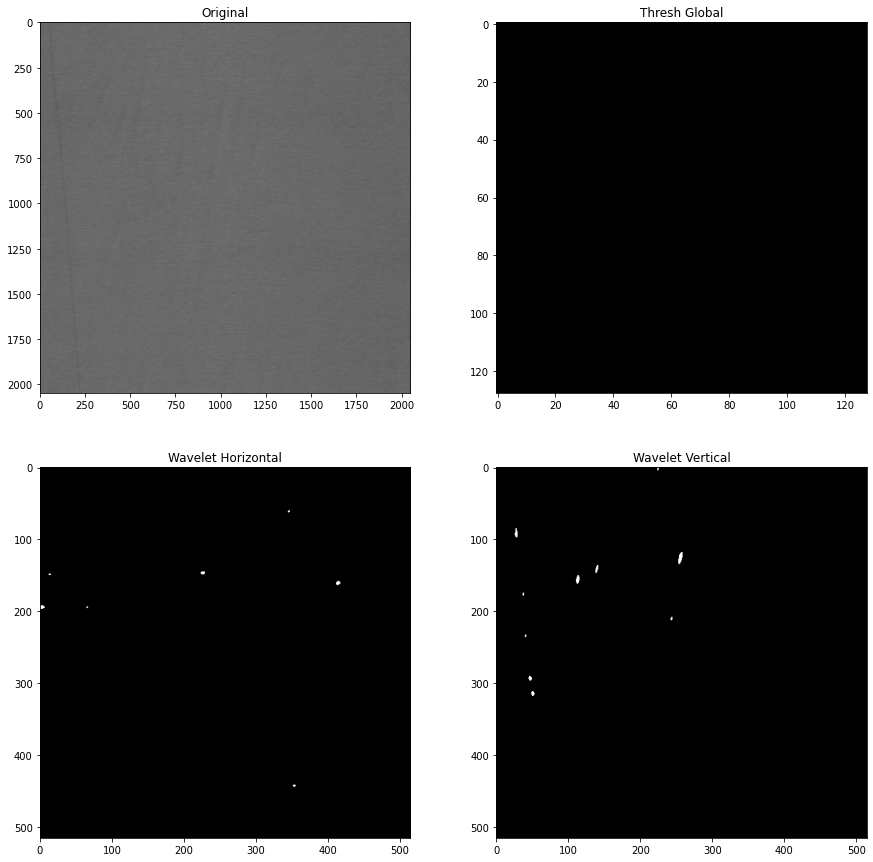

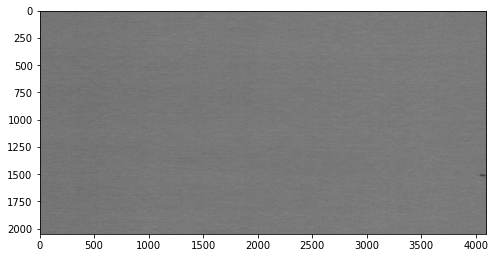

Combined Thresh


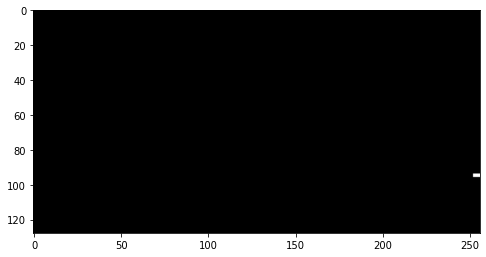

Thresh Global


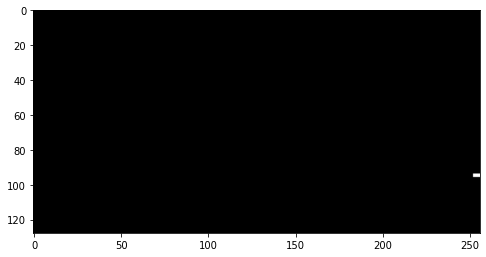

Wavelet Horizontal


Wavelet Vertical


Imagem Numero 4
Media imagem pequena: 120.85299682617188 Variancia: 8.119411795400083
---Threshold time is: 0.0004184246063232422 seconds ---
White pixels count: 3
Variancia Vertical: 266.20056845527046
Variancia Horizontal: 187.7120844631695
---Wavelet time is: 2.0935754776000977 seconds ---
Original


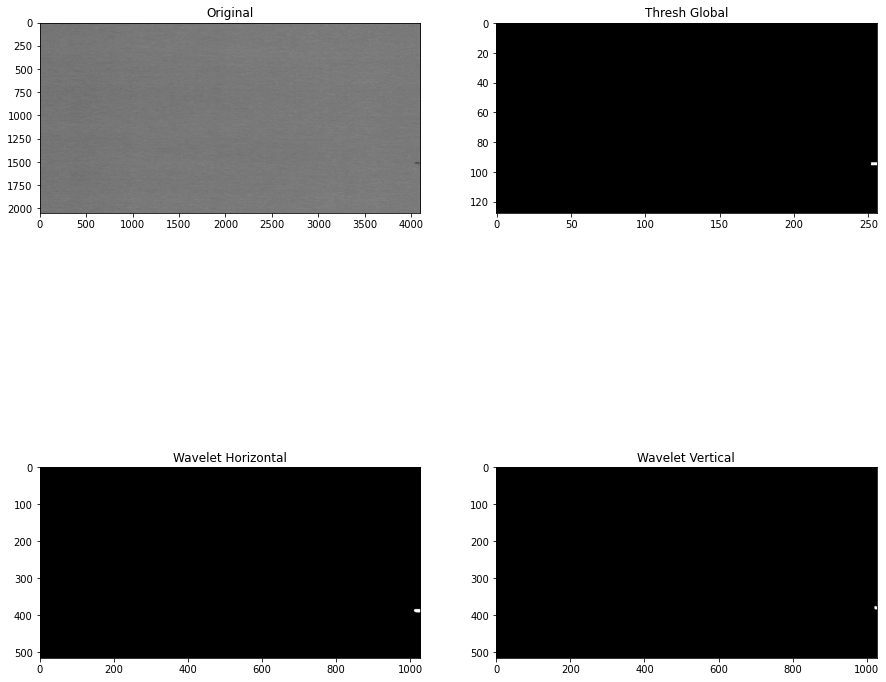

Combined Thresh


Thresh Global


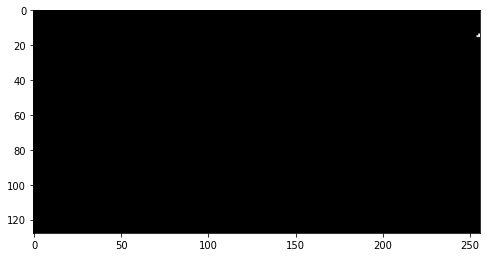

Wavelet Horizontal


Wavelet Vertical


Imagem Numero 5
Media imagem pequena: 104.64141845703125 Variancia: 3.4643758200109005
---Threshold time is: 0.00026988983154296875 seconds ---
White pixels count: 0
Variancia Vertical: 411.445683264265
Variancia Horizontal: 714.3337263074822
---Wavelet time is: 0.46658825874328613 seconds ---
Original


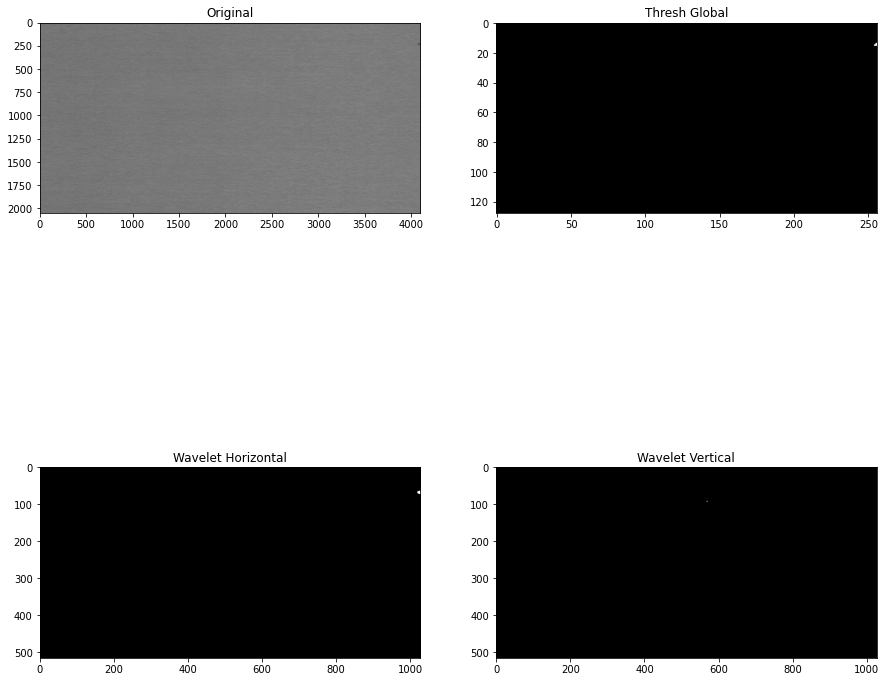

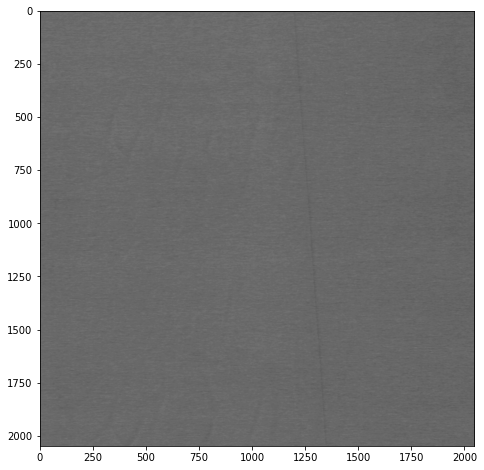

Combined Thresh


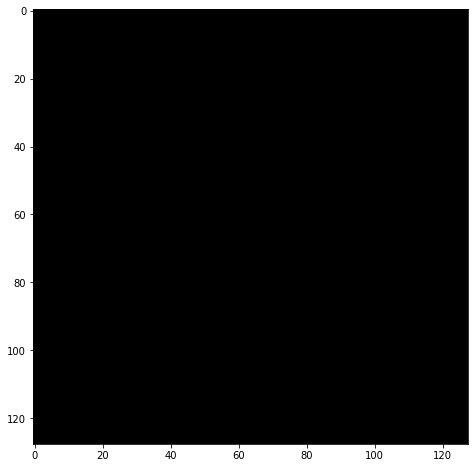

Thresh Global


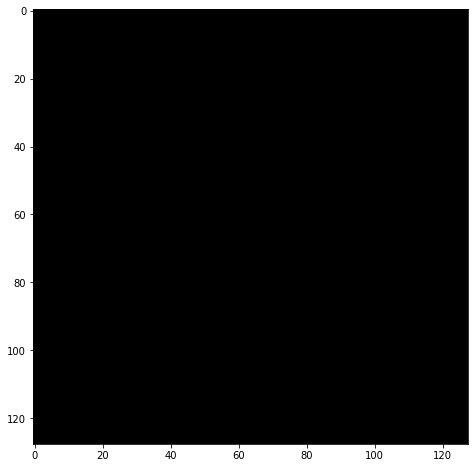

Wavelet Horizontal


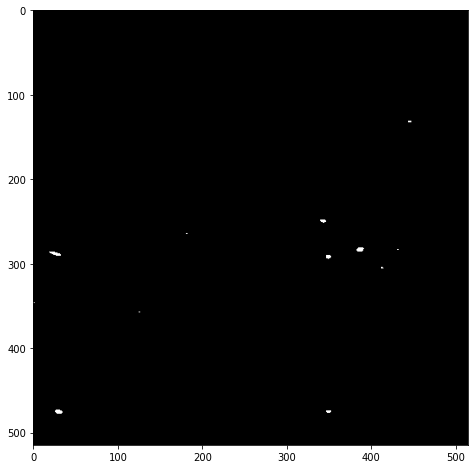

Wavelet Vertical


Imagem Numero 6
Media imagem pequena: 103.85882568359375 Variancia: 2.078153308480978
---Threshold time is: 4.076957702636719e-05 seconds ---
White pixels count: 0
Variancia Vertical: 416.24035756181775
Variancia Horizontal: 823.5248316946928
---Wavelet time is: 0.41818809509277344 seconds ---
Original


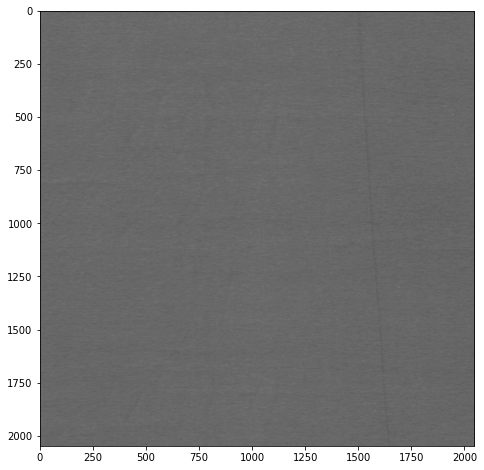

Combined Thresh


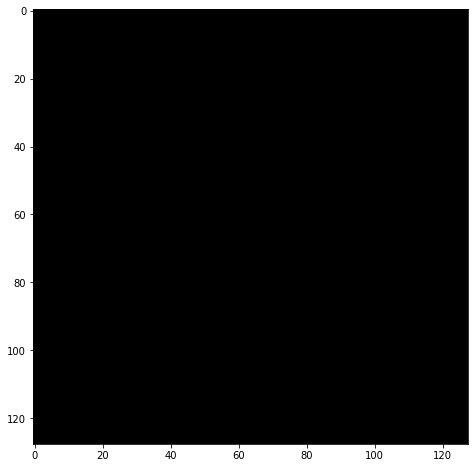

Thresh Global


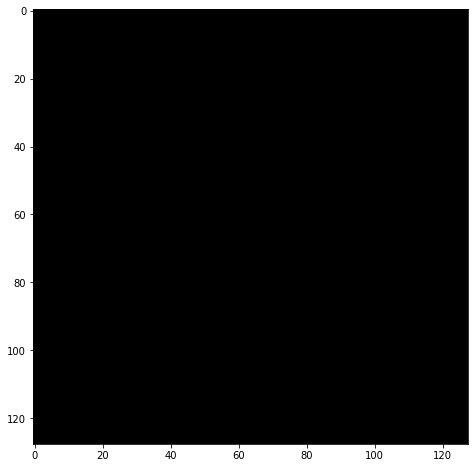

Wavelet Horizontal


Wavelet Vertical


In [ ]:
#processar defeitos fisicos
idx = 0
for img in test_images_fisic:
  print("Imagem Numero",idx)
  idx += 1
  #processar com threshold simples
  #faz piramide da imagem para remover ruidos
  downArray = cv2.pyrDown(img)
  downArray = cv2.pyrDown(downArray)
  downArray = cv2.pyrDown(downArray)
  downArray = cv2.pyrDown(downArray)
  #downArray = cv2.GaussianBlur(downArray, (5, 5), 0)
  #downArray = cv2.GaussianBlur(img, (33, 33), 0)
  #downArray = cv2.GaussianBlur(downArray, (11, 11), 0)
  
  #obtem media da imagem
  avg = np.mean(downArray)
  var = np.var(downArray)
  print("Media imagem pequena:",avg,"Variancia:",var)
  start_time = time.time()
  ret,out = cv2.threshold(downArray,(avg*0.93),255,cv2.THRESH_BINARY_INV)
  ret,outBrightDefect = cv2.threshold(downArray,(avg*1.07),255,cv2.THRESH_BINARY)
  combinedThresh = cv2.bitwise_or(out,outBrightDefect)
  print("---Threshold time is: %s seconds ---" % (time.time() - start_time))
  
  #rescala a imagem para o tamanho original
  downArray = cv2.resize(downArray, None, fx = 16.0, fy = 16.0,)
  #faz o threshold da imagem baseados na media para obter os defeitos 
  nzCount = cv2.countNonZero(out);
  print("White pixels count:", nzCount)
  


  start_time = time.time()
  #processar com wavelet
  coeffs1 = pywt.dwt2(downArray, 'bior1.3',)
  LL, (LH, HL, HH) = coeffs1
  coeffs2 = pywt.dwt2(LL, 'bior1.3',)
  LL2, (LH2, HL2, HH2) = coeffs2
  #scale image to 0-255 pixel values
  LH2 = np.asmatrix(((LH2 - LH2.min()) * (1/(LH2.max() - LH2.min()) * 255)).astype('uint8'))
  HL2 = np.asmatrix(((HL2 - HL2.min()) * (1/(HL2.max() - HL2.min()) * 255)).astype('uint8'))
  HH2 = np.asmatrix(((HH2 - HH2.min()) * (1/(HH2.max() - HH2.min()) * 255)).astype('uint8'))
  
  print("Variancia Vertical:",np.var(HL2))
  #vertical
  HL2 = cv2.GaussianBlur(HL2, (5, 5), 0)
  HL2 = cv2.GaussianBlur(HL2, (21, 21), 0)
  ret,threshVertical = cv2.threshold(HL2,int(np.mean(HL2)*0.85),255,cv2.THRESH_BINARY_INV)
  #horizontal
  print("Variancia Horizontal:",np.var(LH2))
  LH2 = cv2.GaussianBlur(LH2, (5, 5), 0)
  LH2 = cv2.GaussianBlur(LH2, (21, 21), 0)
  ret,threshHorizontal = cv2.threshold(LH2,int(np.mean(LH2)*0.85),255,cv2.THRESH_BINARY_INV)
  print("---Wavelet time is: %s seconds ---" % (time.time() - start_time))

  # print("Original")
  # plt.figure(figsize=(8,8))
  # plt.imshow(img, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Combined Thresh")
  # plt.figure(figsize=(8,8))
  # plt.imshow(combinedThresh, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Thresh Global")
  # plt.figure(figsize=(8,8))
  # plt.imshow(out, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Wavelet Horizontal")
  # plt.figure(figsize=(8,8))
  # plt.imshow(threshHorizontal, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Wavelet Vertical")
  # plt.figure(figsize=(8,8))
  # plt.imshow(threshVertical, cmap='gray',vmin=0,vmax=255)
  # plt.show()


  fig, ax = plt.subplots(2,2,figsize=(15,15))
  ax[0,0].imshow(img,cmap='gray',vmin=0,vmax=255);
  ax[0,0].set_title('Original')
  ax[0,1].imshow(combinedThresh,cmap='gray',vmin=0,vmax=255);
  ax[0,1].set_title('Thresh Global')
  ax[1,0].imshow(threshHorizontal,cmap='gray',vmin=0,vmax=255);
  ax[1,0].set_title('Wavelet Horizontal')
  ax[1,1].imshow(threshVertical,cmap='gray',vmin=0,vmax=255);
  ax[1,1].set_title('Wavelet Vertical')
  # ax[2,0].imshow(otsu,cmap='gray',vmin=0,vmax=255);
  # ax[2,0].set_title('Otsu Thresh')

## Processa Sem Defeitos

Imagem Numero 0
Media imagem pequena: 130.14761352539062 Variancia: 2.0668027764186263
---Threshold time is: 0.00048828125 seconds ---
White pixels count: 0
Variancia Vertical: 312.96351083752785
Variancia Horizontal: 609.6286184480899
---Wavelet time is: 2.2813568115234375 seconds ---
Original


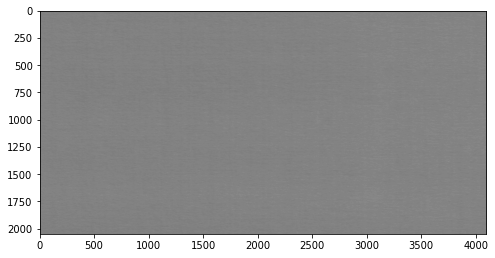

Combined Thresh


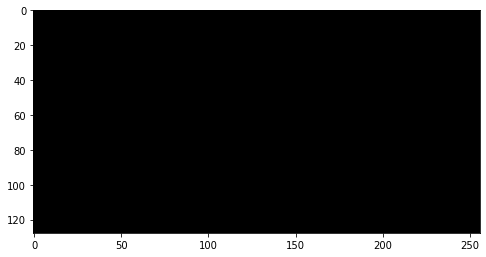

Thresh Global


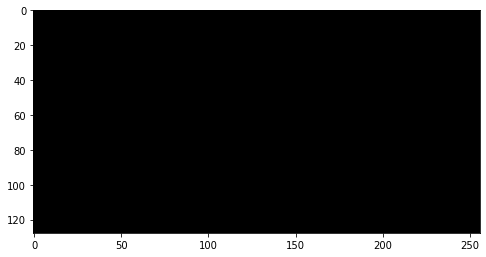

Wavelet Horizontal


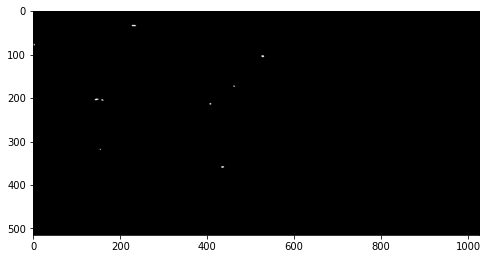

Wavelet Vertical


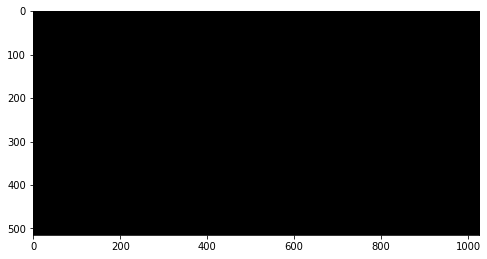

Imagem Numero 1
Media imagem pequena: 129.69195556640625 Variancia: 2.0351135097444057
---Threshold time is: 0.0001747608184814453 seconds ---
White pixels count: 0
Variancia Vertical: 320.2458037275462
Variancia Horizontal: 674.4858949478455
---Wavelet time is: 2.309182643890381 seconds ---
Original


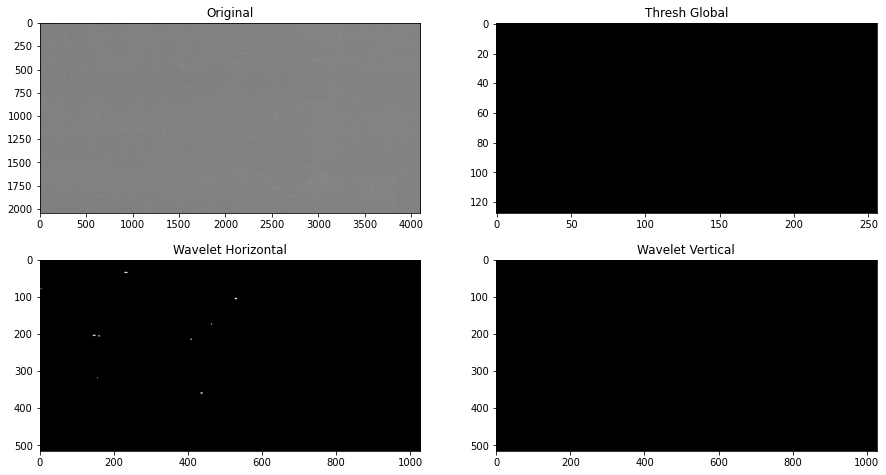

Combined Thresh


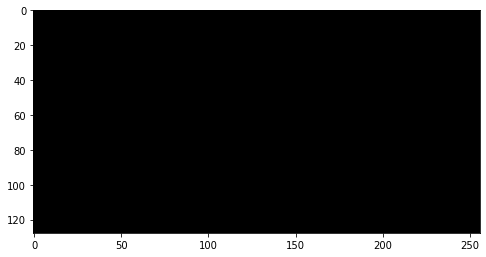

Thresh Global


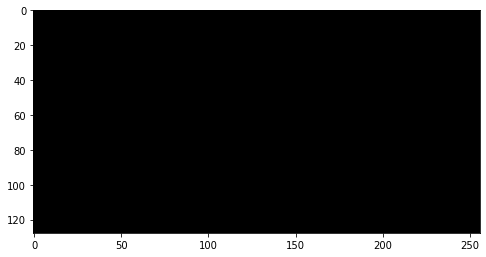

Wavelet Horizontal


Wavelet Vertical


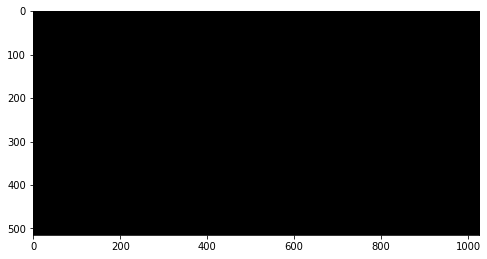

Imagem Numero 2
Media imagem pequena: 129.72802734375 Variancia: 1.6965997219085693
---Threshold time is: 0.0005030632019042969 seconds ---
White pixels count: 0
Variancia Vertical: 295.439658299916
Variancia Horizontal: 663.9858977367817
---Wavelet time is: 2.280555009841919 seconds ---
Original


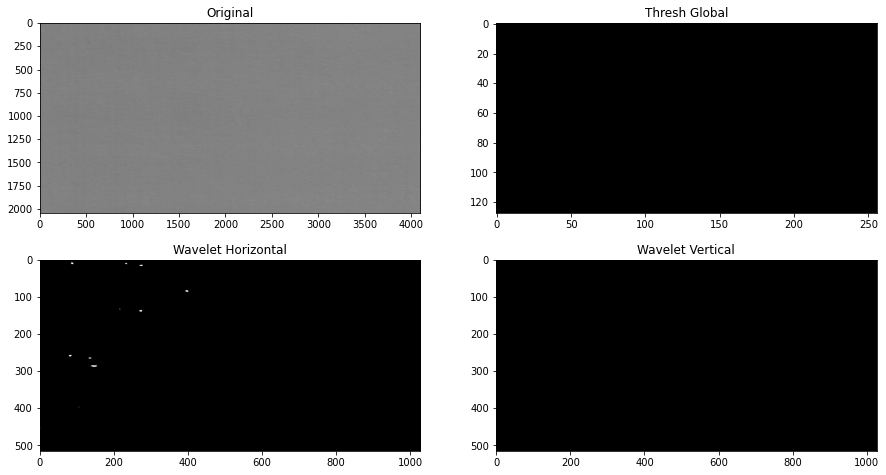

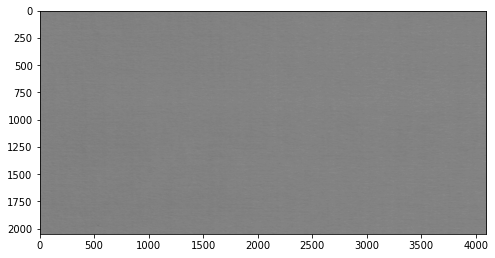

Combined Thresh


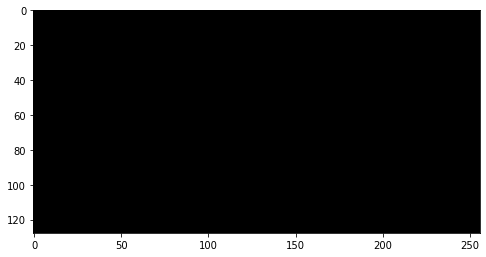

Thresh Global


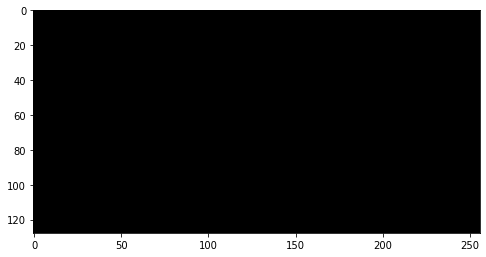

Wavelet Horizontal


Wavelet Vertical


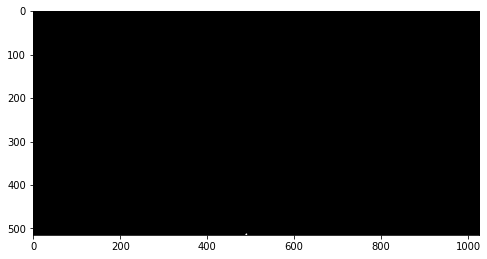

Imagem Numero 3
Media imagem pequena: 119.80960083007812 Variancia: 5.665072618983686
---Threshold time is: 0.0002543926239013672 seconds ---
White pixels count: 0
Variancia Vertical: 435.2838453929685
Variancia Horizontal: 979.7804375783838
---Wavelet time is: 2.2432568073272705 seconds ---
Original


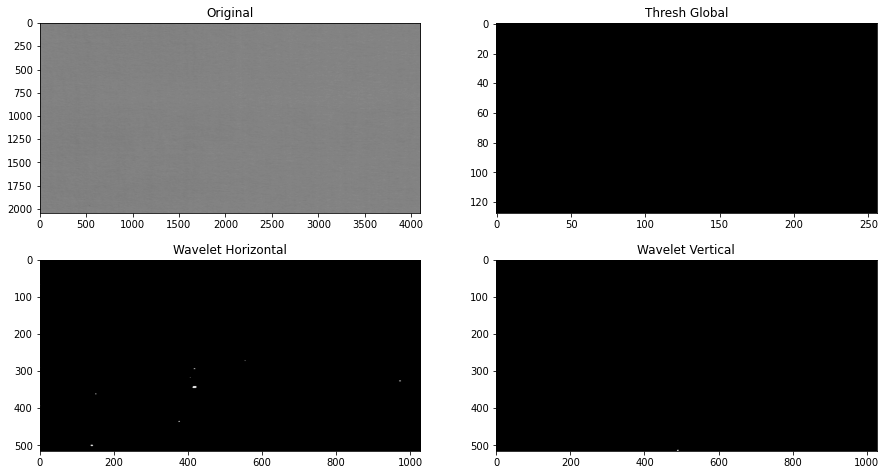

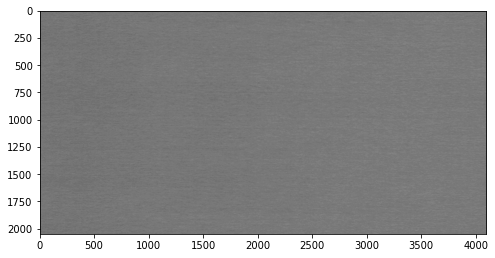

Combined Thresh


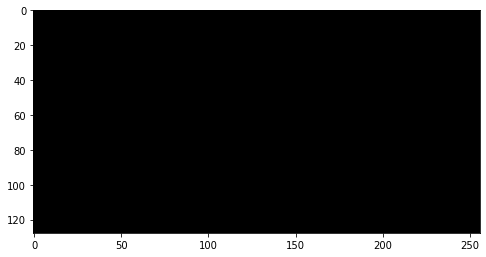

Thresh Global


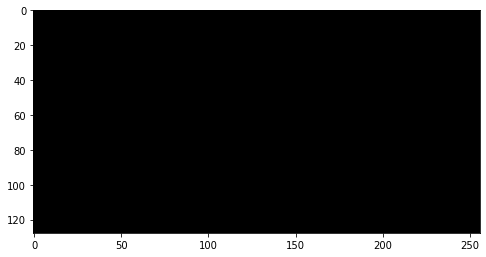

Wavelet Horizontal


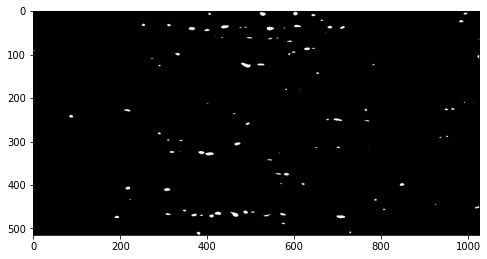

Wavelet Vertical


Imagem Numero 4
Media imagem pequena: 119.91387939453125 Variancia: 5.660185780376196
---Threshold time is: 0.00016260147094726562 seconds ---
White pixels count: 0
Variancia Vertical: 452.25805736465617
Variancia Horizontal: 1007.1624999037227
---Wavelet time is: 2.247727870941162 seconds ---
Original


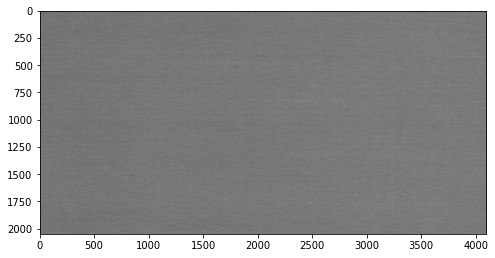

Combined Thresh


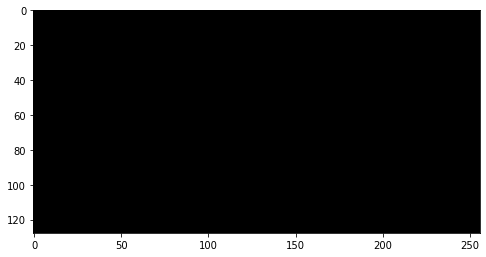

Thresh Global


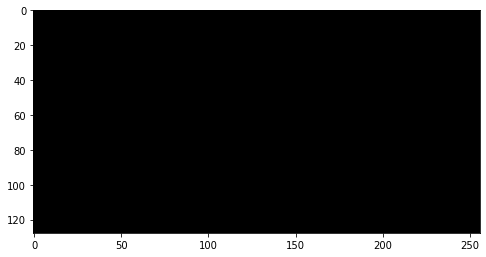

Wavelet Horizontal


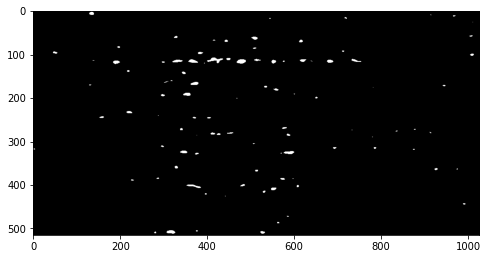

Wavelet Vertical


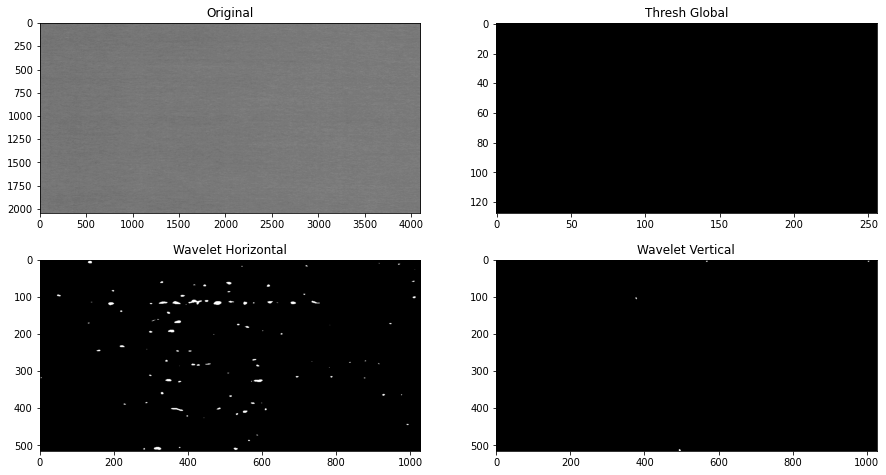

In [ ]:
#processar sem defeitos
idx = 0
for img in test_images_none:
  print("Imagem Numero",idx)
  idx += 1
  #processar com threshold simples
  #faz piramide da imagem para remover ruidos
  downArray = cv2.pyrDown(img)
  downArray = cv2.pyrDown(downArray)
  downArray = cv2.pyrDown(downArray)
  downArray = cv2.pyrDown(downArray)
  #downArray = cv2.GaussianBlur(downArray, (5, 5), 0)
  
  #downArray = cv2.GaussianBlur(img, (33, 33), 0)
  #downArray = cv2.GaussianBlur(downArray, (11, 11), 0)
  
  #obtem media da imagem
  avg = np.mean(downArray)
  var = np.var(downArray)
  print("Media imagem pequena:",avg,"Variancia:",var)
  start_time = time.time()
  ret,out = cv2.threshold(downArray,(avg*0.93),255,cv2.THRESH_BINARY_INV)
  ret,outBrightDefect = cv2.threshold(downArray,(avg*1.07),255,cv2.THRESH_BINARY)
  print("---Threshold time is: %s seconds ---" % (time.time() - start_time))
  combinedThresh = cv2.bitwise_or(out,outBrightDefect)
  
  #rescala a imagem para o tamanho original
  downArray = cv2.resize(downArray, None, fx = 16.0, fy = 16.0,)
  #faz o threshold da imagem baseados na media para obter os defeitos 
  nzCount = cv2.countNonZero(out);
  print("White pixels count:", nzCount)
  
  
  #ret2,otsu = cv2.threshold(downArray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  start_time = time.time()
  #processar com wavelet
  coeffs1 = pywt.dwt2(downArray, 'bior1.3',)
  LL, (LH, HL, HH) = coeffs1
  coeffs2 = pywt.dwt2(LL, 'bior1.3',)
  LL2, (LH2, HL2, HH2) = coeffs2
  #scale image to 0-255 pixel values
  LH2 = np.asmatrix(((LH2 - LH2.min()) * (1/(LH2.max() - LH2.min()) * 255)).astype('uint8'))
  HL2 = np.asmatrix(((HL2 - HL2.min()) * (1/(HL2.max() - HL2.min()) * 255)).astype('uint8'))
  HH2 = np.asmatrix(((HH2 - HH2.min()) * (1/(HH2.max() - HH2.min()) * 255)).astype('uint8'))
  
  print("Variancia Vertical:",np.var(HL2))
  #vertical
  HL2 = cv2.GaussianBlur(HL2, (5, 5), 0)
  HL2 = cv2.GaussianBlur(HL2, (21, 21), 0)
  ret,threshVertical = cv2.threshold(HL2,int(np.mean(HL2)*0.85),255,cv2.THRESH_BINARY_INV)
  #horizontal
  print("Variancia Horizontal:",np.var(LH2))
  LH2 = cv2.GaussianBlur(LH2, (5, 5), 0)
  LH2 = cv2.GaussianBlur(LH2, (21, 21), 0)
  ret,threshHorizontal = cv2.threshold(LH2,int(np.mean(LH2)*0.85),255,cv2.THRESH_BINARY_INV)
  print("---Wavelet time is: %s seconds ---" % (time.time() - start_time))

  # print("Original")
  # plt.figure(figsize=(8,8))
  # plt.imshow(img, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Combined Thresh")
  # plt.figure(figsize=(8,8))
  # plt.imshow(combinedThresh, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Thresh Global")
  # plt.figure(figsize=(8,8))
  # plt.imshow(out, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Wavelet Horizontal")
  # plt.figure(figsize=(8,8))
  # plt.imshow(threshHorizontal, cmap='gray',vmin=0,vmax=255)
  # plt.show()
  # print("Wavelet Vertical")
  # plt.figure(figsize=(8,8))
  # plt.imshow(threshVertical, cmap='gray',vmin=0,vmax=255)
  # plt.show()


  fig, ax = plt.subplots(2,2,figsize=(15,8))
  ax[0,0].imshow(img,cmap='gray',vmin=0,vmax=255);
  ax[0,0].set_title('Original')
  ax[0,1].imshow(combinedThresh,cmap='gray',vmin=0,vmax=255);
  ax[0,1].set_title('Thresh Global')
  ax[1,0].imshow(threshHorizontal,cmap='gray',vmin=0,vmax=255);
  ax[1,0].set_title('Wavelet Horizontal')
  ax[1,1].imshow(threshVertical,cmap='gray',vmin=0,vmax=255);
  ax[1,1].set_title('Wavelet Vertical')
  # ax[2,0].imshow(otsu,cmap='gray',vmin=0,vmax=255);
  # ax[2,0].set_title('Otsu Thresh')

(2048, 4096)


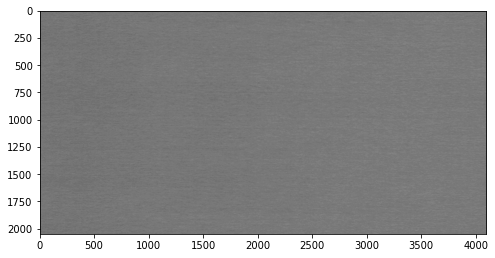

Media Imagem Orig: 119.81188678741455


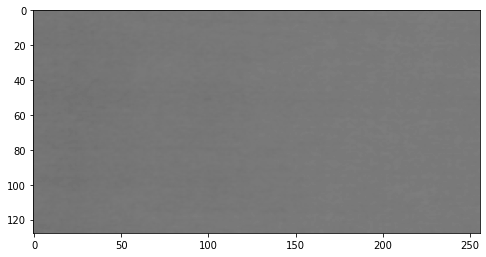

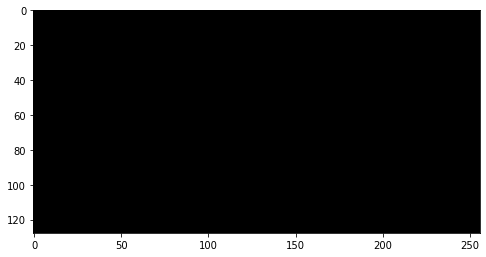

Original


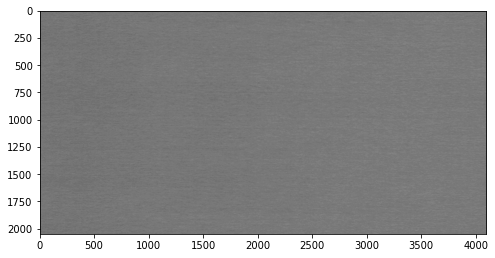

Very blured


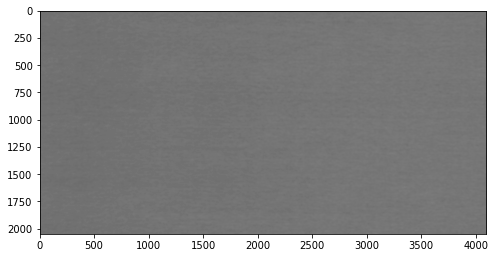

Media Imagem Blured: 116.08907294273376


Shape Array total 256 512


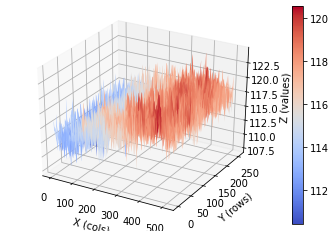

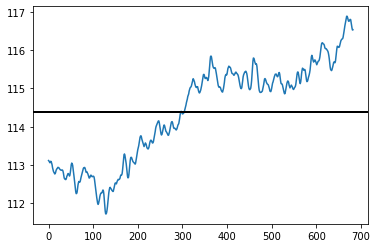

(4096,)
5.847534596920013
